<a href="https://colab.research.google.com/github/ConradBitt/BootCamp_DataScience/blob/master/conrado_bittencourt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumo 

Neste trabalho foram utilizados quatro estimadosres, Logistic Regression, Decision Tree Classifier, SGDClassifier e SVC, além disso um base line (DummyClassifier), cujo objetivo principal é classificar se pacientes precisam ou não de um serviço de atendimento em um dos leitos da unidade de terapia intensiva. Dentre as mais de duzentas variáveis disponíveis para utilizar neste ofício, foi feita uma seleção através de testes não paramétricos para garantir que as variáveis não provenham de uma mesma distribuição, em seguida fizemos uma busca aleatória por hiperparâmetros dos modelos com a técnica de validação cruzada. Por fim, os objetivos foram atingidos com a ressalva de que apenas um dos modelos, o Logistic Regression, mostrou com a vantagem de errar menos do que os outros, apresentando uma sensibilidade de 70% e 73% entre os pacientes que precisam e não precisam de UTI, respectivamente, e um valor preditivo positivo de 80% para os pacientes que não precisam de UTI e 26% de falsos negativos para a mesma situação.



# Introdução

Neste projeto será utilizada a base de dados fornecida pelo Hospital Sírio Libanês. Ela esta disponível no site do [Kaggle](https://www.kaggle.com/) na pagina do grupo do Sírio Libanês [COVID-19 - Clinical Data to assess diagnosis](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19). Essa base de dados contém informações, não sensíveis, que diz respeito a quantidade de pacientes que foram ou não internados por covid-19 na clínica do hospital durante a pandemia de corona virus. A pandemia de COVID-19 atingiu o mundo inteiro, sobrecarregando os sistemas de saúde, governos, estados e municípios, todos ficaram despreparados para uma demanda tão intensa por leitos de UTI, profissionais, equipamentos de proteção individual e outros recursos de saúde.

O Brasil registrou o primeiro caso COVID-19 em 26 de fevereiro e atingiu a transmissão na comunidade em 20 de março. Dentro dessa perspectiva em que o patógeno tem poder de sobrecarregar leitos de UTI, o objetivo é avaliar a capacidade dos modelos preditivos em estimar se um paciente, dadas as condições clinicas, vai precisar ou não de um serviço de UTI.

## O problema 

Apesar do virus não ter uma letalidade tão alta a disseminação dele é. Ao infectar muitas pessoas, uma parcela delas precisará de assistência médica. Portanto, como a quantidade de pessoas que necessitam de assitência é extremamente alta e assim a pressão sobre o sistema de saúde se eleva.

Há urgência na obtenção de dados precisos para prever melhor as possiveis situações em que um paciente se encontra e antecipar o preparo os sistemas de saúde e hospitais de campanha, visando evitar colapsos de toda a estrutura sanitaria. Tudo isso usando dados clínicos individuais - em vez de dados epidemiológicos e populacionais.

O colapso do sistema de saúde ocorre quando toda a estrutura não comporta a quantidade de atendimentos de qualquer natureza devido a alta demanda dos serviços de saúde. Nesta situação não basta só ter  hospitais, é necessário equipes médicas, equipes de enfermagem e outros técnicos, e estes profissionais levam anos para serem capacitados. Existe um limitar que expressa a capacidade de atendimento de um sistema de saúde, ele é ilustrado na imagem abaixo:

<img src='https://img.medscape.com/thumbnail_library/cdc_200313_flatten_the_curve_800x450.jpg'>

> Fonte: [COVID-19 - Clinical Data to assess diagnosis](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)


## Objetivos 

Ilutrado os problemas acima, podemos definir como objetivos as seguintes tarefas.

1. Prever a admissão na UTI de *casos confirmados* de COVID-19. Com base nos dados disponíveis, é viável prever quais pacientes precisarão de suporte em unidade de terapia intensiva?

O objetivo é fornecer aos hospitais terciários e trimestrais a resposta mais precisa, de modo que os recursos da UTI possam ser arranjados ou a transferência do paciente agendada.

2. Prever NÃO admissão à UTI de *casos COVID-19 confirmados*. Com base na subamostra de dados amplamente disponíveis, é viável prever quais pacientes precisarão de suporte de unidade de terapia intensiva?

O objetivo é fornecer aos hospitais locais e temporários uma resposta boa o suficiente, para que os médicos de linha de frente possam dar alta com segurança e acompanhar remotamente esses pacientes. 

## O Conceito de Janela 

Na pagina do Kaggle é ilustrado o conceito de janela. Em uma janela existe dados agrupados de um paciente, que consiste em: 

**Paciente**: 
 - Visita do Paciente
 - Agregada por janelas em ordem cronológica


|Janela|Descrição|
---|---
0-2|de 0 a 2 horas da admissão no hospital
2-4|de 2 a 4 horas da admissão no hospital
4-6|de 4 a 6 horas da admissão no hospital
6-12|de 6 a 12 horas da admissão no hospital
Acima-12|Acima de 12 horas da admissão no hospital

**OBS:** *Cuidado para NÃO usar os dados quando o paciente já estiver na UTI, pois a ordem do evento é desconhecida (talvez o evento "coleta de informação" tenha acontecido antes ou depois do paciente se encontrar na unidade). Eles foram mantidos para que no futuro possam aumentar este conjunto de dados em outros resultados posteriormente.*

**Ilustração de como funciona uma janela de informações**:
<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2Fb1bc424df771a4d2d3b3088606d083e6%2FTimeline%20Example%20Best.png?generation=1594740856017996&alt=media'>

> Acima temos um paciente que deu entrada no sistema e só foi para a UTI na janela acima de 12h.

<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2F77ca2b4635bc4dd7800e1c777fed9de1%2FTimeline%20Example%20No.png?generation=1594740873237462&alt=media'>

> Acima temos um paciente que foi para a UTI na janela de 2h. 

> Fonte: [COVID-19 - Clinical Data to assess diagnosis](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)

Note que até o paciente ir para a UTI podemos utilizar os registros informados na base de dados, entrentanto se o paciente foi para UTI, as informações não podem ser usadas, pois não sabemos se ela foi feita antes do paciente ir para unidade ou depois. Então nesta situação as informações não tem poder preditivo.

## Os dados 

Este conjunto de dados contém dados anônimos do Hospital Sírio-Libanês, de São Paulo e de Brasília. Todos os dados foram tornados anônimos seguindo as melhores práticas e recomendações internacionais.

Os dados foram limpos e escalados por coluna de acordo com Min Max Scaler para caber entre -1 e 1. 

### A respeito da importância da anonimização dos dados

A Lei Geral de Proteção de Dados Pessoais (LGPD), Lei nº 13.709, de 14 de agosto de 2018, dispõe sobre o tratamento de dados pessoais, inclusive nos meios digitais, por pessoa natural ou por pessoa jurídica de direito público ou privado, com o objetivo de proteger os direitos fundamentais de liberdade e de privacidade e o livre desenvolvimento da personalidade da pessoa natural. 

Tendo em vista a vigência dessa Lei, de suma importancia pra sociedade, é importante que os dados sejam anonimizados para respeitar os direitos dos cidadãos brasileiros. É importante citar isso pois anonimização de um dado deve ser muito bem feita afim de não violar o direito dos individuos.

Note que só o fato de sabermos que a mostra foi retirada dentre os pacientes do Hospital Sírio Libanês em um intervalo X de tempo já reduz muito o fator de anonimidade do dado e se uma variável fosse explicitamente a comorbidade "diabetes", "pressão alta" ou "HIV", caso as variáveis não fossem *clusterizadas*, sabendo a prevalência de uma doença numa população é possível encontrar as características de cada amostra e é importante dificultar este tipo de análise para estar de acordo com a lei de proteção de dados.

Uma forma de anonimizar esses dados é criar grupos de características entre as amostras evitando assim de informar exatamente quais são as características de um elemento da base de dados. 

> Fonte: [Lei Geral de Proteção de Dados - LGPD](https://www.planalto.gov.br/ccivil_03/_Ato2015-2018/2018/Lei/L13709.htm#ementa)


### Dados Disponíveis

|Grupo de dados| quantidade de informações|
|---|---|
|Informação demográfica| 3 |
|Doenças pré-existentes| 9 |
|Resultados do exame de sangue| 36 |
|Sinais vitais | 6 |

No total, temos 54 variáveis, expandidas quando *pertinente* para a **média, mediana, máximo, mínimo, diff (Máximo - Mínimo)** e **diff relativa (diff/mediana)**

**Dicas**

* **Dados Faltantes:**

    **Problema:** um dos maiores desafios de trabalhar com dados de saúde é que a taxa de amostragem varia nas suas diferentes medidas. Por exemplo, sinais vitais são medidos com mais frequencia (normalmente de hora em hora) do que os exames de sangue (diários).

    **Sugestão:** é razoável presumir que um paciente que não tem uma medida registrada em uma janela de tempo está clinicamente estável, apresentando  sinais vitais e exames de sangue similares aos das janelas vizinhas. Portanto, se pode preencher os dados faltantes usando os dados da janela anterior ou posterior. Atenção para a multicolinearidade e casos de variância 0 nestes dados quando for escolher seu algoritmo.

---
# Importações e definições

Aqui estão todos módulos python que vou utilizar neste trabalho, bem como as funções criadas para exibições. 

## Importações

In [1]:
# Módulos que é sempre bom ter à mão
import numpy as np  # Versão: 1.19.2
import pandas as pd  #  Versão: 1.2.2
import seaborn as sns  #  Versão: 0.11.1
from matplotlib import pyplot as plt  #  Versão: 3.3.4

# statsmodels  Versão: 0.12.2
from statsmodels import api as sm 
from statsmodels import stats as ss
from statsmodels.stats.weightstats import zconfint, ztest

# Scipy
import scipy  # Versão: 1.6.1
from scipy.stats import wilcoxon, normaltest


# Sci-kit Learn  Versão: 0.24.1
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_roc_curve, roc_auc_score

from sklearn.metrics import plot_confusion_matrix

### Base de dados

In [2]:
sirio_libanes = pd.read_excel('https://github.com/ConradBitt/BootCamp_DataScience/blob/master/ML%20em%20Saude/dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true')

## Definições e Funções

Esta etapa pode não seguir a ordem cronológica do relatório, aqui vou escrever os códigos para evitar que tenha várias funções complexas ao longo da análise. Contruindo funções aqui facilita analisar apenas os outputs de cada função no futuro.

In [3]:
#np.random.randint(0,2**32) # semente gerada: 3340758118
seed = 3340758118

# ===================================== Análise exploratória ======================
# Estatisticas descritivas dos dados 

## Muda identificador 
def muda_identificador(dados):
    """
    Muda o index para o identificador PATIENT_VISIT_IDENTIFIER
    """
    dados_novo_id = dados.set_index('PATIENT_VISIT_IDENTIFIER')
    return dados_novo_id
        
# Describe do statsmodels 
def descricoes_pandas_statsmodels(dados):
    """
    Retorna uma tupla com estatisticas descritivas
    usando o pandas e o statsmodels.
    """
    descricoes_stats_models = ss.descriptivestats.Description(dados)
    descricoes_pandas = dados.describe()
    return descricoes_pandas, descricoes_stats_models


def exibe_frequencia_variaveis_categoricas(dados):
    """
    Recebe dados analisa o tipo e retorna um
    dataframe com as frequências de cada elemento
    """
    for coluna in dados.columns:
        if sirio_libanes[coluna].dtype != float:
            display(sirio_libanes[coluna].value_counts().to_frame().T)
        elif coluna == "WINDOW":
            display(sirio_libanes[coluna].value_counts().to_frame().T)
        elif coluna == "AGE_PERCENTIL":
            display(sirio_libanes[coluna].value_counts().to_frame().T)
    return None

    


def exibe_mapa_correlaçao(dados, title='', metodo = 'pearson', cmap='cool', figsize=(20,12), annot=False):
    """
    Exibe um mapa de correlação.
    """
    corr = dados.corr(method=metodo)
    plt.figure(figsize=figsize)
    ax = sns.heatmap(corr, cmap=cmap, annot=annot, fmt='.2f')
    ax.set_title(title, fontsize=20, pad=20)
    return ax

# ===================================== Pré processamento ======================

def categorico_para_quantitativo(dados, variavel_categorica):
    """
    Muda os dados quantiativos para categoricos. 
    """
    le = LabelEncoder()
    le.fit(dados[variavel_categorica])
    dados[variavel_categorica] = le.fit_transform(dados[variavel_categorica]) / 10
    return dados

def normaliza_window_pela_freq_prim_janeila(dados, variavel):
    """
    Esta função categoriza a variável WINDOW pela frequencia 
    da primeira janela. Basicamente extrai a frequência dos 
    elementos que compõem a variável e divide cada uma delas
    pela frequencia do primeiro elemento. Em seguida faz um 
    replace na variável original. 
    """
    mapa = dados[variavel].value_counts(normalize=True) / (dados[variavel].value_counts(normalize=True)[0])
    dados[variavel] = dados[variavel].replace(mapa)
    dados = dados.dropna()
    return dados


def interpolacao(grupo):
    return grupo.interpolate(method='linear', limit=1, limit_direction='both')


def preenche_nan(dados):
    """
    Esta função preenche os dados do tipo NaN.
    Primeiro ela agrupa os dados pelo identificador,
    Aplica uma interpolação linear entre os visinhos
    Aplica um preenchimento com o registro anterior
    Aplica um preenchimento com o registro posteior
    retorna o dataframe com os dados preenchidos.
    """
    
    # separação de features em categoricas continuas e os classificadores.
    features_categoricas = dados.iloc[:,:13]
    colunas_features_continuas = dados.iloc[:,13:-2].columns
    classificadores = dados.iloc[:,-2:]
    
    features_continuas = dados.groupby('PATIENT_VISIT_IDENTIFIER')[colunas_features_continuas].apply(
        interpolacao
    ).fillna(method='backfill').fillna(method='ffill')
    
    dado_preenchido = pd.concat([features_categoricas, features_continuas, classificadores],
                                axis=1, ignore_index=False)
    dado_preenchido.columns = dados.columns
    dado_preenchido = dado_preenchido.fillna(value=0)
    return dado_preenchido


def foi_para_UTI(dado_agrupado : pd.DataFrame):
    """
    Esta função verifica quais pacientes foram pra UTI na janela.
    Se o paciente foi pra UTI na janela 2, então adiciona o valor 1
    na coluna ICU anterior e retorna todo o grupo até ela.
    """
    
    if np.any(dado_agrupado['ICU']):  # se o paciente foi em algum momento pra uti    
        
        # momento em que foi para UTI
        momento_foi_para_uti = len(dado_agrupado['ICU']) - dado_agrupado['ICU'].sum()
        
        # adicionando 1 na janela anterior a que o paciente foi para UTI
        for linha in range(len(dado_agrupado)):
            if dado_agrupado.loc[:,'ICU'].iloc[linha] == 1:
                dado_agrupado.loc[:,'ICU'].iloc[linha - 1] = 1  # adicionar 1 na coluna ICU anterior
        
        if momento_foi_para_uti != 0:  #  se não foi na primeira janela
            # retorna o grupo até a janela em que ele foi para UTI
            return dado_agrupado.iloc[:momento_foi_para_uti, :]
        
        elif momento_foi_para_uti == 0:  # se tem todas as linhas preenchidas
            return dado_agrupado.iloc[momento_foi_para_uti, :]
        #else:
            # retorna o paciente que foi pra UTI na primeira janela
            # talvez esta linha abaixo possa ser desconsiderada
        #    return dado_agrupado.iloc[momento_foi_para_uti, :].to_frame().T   
    else:
        # retorna o paciente que não foi em nenhum momento para a UTI
        return dado_agrupado
    
def filtro_janelas_uteis(dado):
    """
    Filtra os registros pelas janelas úteis dos pacientes
    que foram para a UTI e também daqueles que não foram.
    """
    dado_filtrado = dado.groupby('PATIENT_VISIT_IDENTIFIER').apply(foi_para_UTI)
    dado_filtrado = dado_filtrado.reset_index().set_index('PATIENT_VISIT_IDENTIFIER')
    dado_filtrado = dado_filtrado[dado.columns]
    return dado_filtrado


def remove_variaveis_altamente_correlacionadas(dados, metodo_correlacao, valor_corte):
    matriz_corr = dados.corr(method=metodo_correlacao).abs()
    matriz_triangular_superior_booleana = np.triu(np.ones(matriz_corr.shape), k=1).astype('bool')
    matriz_trig_sup_corr = matriz_corr.where(matriz_triangular_superior_booleana)
    excluir_elemento = [coluna for coluna in matriz_trig_sup_corr.columns if any(
        matriz_trig_sup_corr[coluna] > valor_corte
    )]
    
    return dados.drop(excluir_elemento, axis='columns')

# ===================================== Estimadores  ======================

## ================== Randomized Search CV ================================

def calcula_precision_recall_fscore_support(estimador, x, y):
    nome_estimador = str(estimador).split("(")[0]
    
    y_predito = estimador.predict(x)
    precision, recall, fscore, support = precision_recall_fscore_support(y, y_predito)
    prfs = pd.DataFrame({'precision':precision,'recall':recall,
              'fscore':fscore, 'support':support}, index=['Não precisa de UTI','Precisa de UTI']).round(2)
    
    print('\n \033[38m'+2*'\t'+f'{nome_estimador}' + 2*'\t' +'\033[0;0m')
    display(prfs)
    
    

def cria_cv_SKF(random_state=seed):
    """
    Cria um objeto de validação cruzada do tipo Stratified K Fold.
    """
    tecnica_cv_SKF = StratifiedKFold(shuffle=True,random_state=random_state)
    return tecnica_cv_SKF


def cria_estimadores_RSCV(estimator,param_distributions, cv, random_state=seed):
    """
    Cria um Randomized Search CV com o estimador, parmâmetros e a técnica de 
    validação cruzada. Retorna um conjunto de estimadores selecionados aleatóriamente
    pronto para a o ajuste '.fit(x,y)'
    """
    estimadores_rscv = RandomizedSearchCV(estimator = estimator,param_distributions = param_distributions,
                                          n_iter = 50, scoring='roc_auc',return_train_score = True, 
                                          cv=cv,random_state=random_state)
    return estimadores_rscv


def formata_estatisticas_descritivas(resultados_cv, estimator):
    """
    Essa função formata o método .describe() de um dataframe
    contruido com os resultados da validação cruzada. Apenas
    inclui o intervalo de confiaça baseado numa distribuição
    normal com o teste Z.
    """
    nome_estimador = str(estimator).split('(')[0]
    
    estatisticas = resultados_cv.describe()[['mean_test_score','mean_train_score']].T
    
    conf_int_test = np.array(zconfint(resultados_cv['mean_test_score'])).round(3)
    conf_int_treino = np.array(zconfint(resultados_cv['mean_train_score'])).round(3)
    
    estatisticas['Z_conf_int'] = [conf_int_test, conf_int_treino]
    estatisticas = estatisticas.rename_axis(index=nome_estimador, columns='Estatisticas')
    return estatisticas
    


def executa_RSCV_com_cv_SKF(estimador, x, y, parametros_estimador, random_state = seed,
                           exibe_resultados_brutos = True, exibe_estatisticas_descritivas = True):
    """
    Executa um modelo randomizado de hiperparâmetros
    com a validação cruzada do tipo SKF e retorna o
    melhor estimador e os resultados brutos de cada CV.
    """
    
    tecnica_cv_SKF = cria_cv_SKF(random_state=seed)    
    informacoes_RSCV = [
        'rank_test_score','mean_fit_time','mean_test_score',
        'std_test_score','mean_train_score','std_train_score'
    ]
    
    estimadores_rscv = cria_estimadores_RSCV(estimador,parametros_estimador,tecnica_cv_SKF, seed)
    estimadores_buscados = estimadores_rscv.fit(x, y)
    
    melhor_estimador = estimadores_buscados.best_estimator_
    
    resultados_busca = pd.DataFrame(estimadores_buscados.cv_results_)[informacoes_RSCV]
    resultados_busca = resultados_busca.sort_values(by='rank_test_score').set_index('rank_test_score')
    
    if exibe_resultados_brutos:
        display(resultados_busca)
    
    if exibe_estatisticas_descritivas:
        estatisticas_descritivas = formata_estatisticas_descritivas(resultados_busca, estimador)
        display(estatisticas_descritivas.round(3))
        pass
    
    melhor_estimador_parametros = 'Melhor estimador: '+'\033[34m'+f'{melhor_estimador}' + '\033[0;0m'
    print(melhor_estimador_parametros)
    return melhor_estimador, resultados_busca

# ==================================== Seleção de Features ================

def executa_teste_normalidade(dataframe):
    """
    Executa um teste de normalidade em cada
    uma das variáveis de um dataframe e retorna
    um outro dataframe com os pvalores de cada
    variável.
    """
    _, p_valor_normal = normaltest(dataframe, axis=0)
    teste_normalidade = pd.DataFrame({'Normal_test':p_valor_normal}, index=dataframe.columns)
    
    return teste_normalidade



def teste_wilcoxon_variaveis(dataframe, exibe_mapa=True):
    """
    Esta função executa o teste de Wilcoxon U para um dataframe quadrado
    ou seja, verifica se as variáveis provém de uma mesma distribuição de
    frequências.
    """
    variaveis = dataframe.columns
    teste_Wilcoxon_U = pd.DataFrame({}, columns = variaveis, index=variaveis)
    for variavel_i in variaveis:
        for variavel_j in variaveis:
            _, pvalor = wilcoxon(dataframe[variavel_i], dataframe[variavel_j],
                                 zero_method='zsplit',mode='approx', correction=True)
            teste_Wilcoxon_U.loc[variavel_i, variavel_j] = pvalor.round(3)  
            
    teste_Wilcoxon_U = teste_Wilcoxon_U.astype('float')
    
    if exibe_mapa:
        ax = sns.heatmap(teste_Wilcoxon_U,cmap='plasma', cbar_kws={'label':'$p-valor$'})
        ax.set_title('Mapa do teste $U$ de Wilcoxon entre variáveis', fontsize=20, pad = 20)
        ax.figure.set_size_inches(15,8)
        
        return teste_Wilcoxon_U, ax
    else:
        return teste_Wilcoxon_U
    
    
def retorna_variaveis_menor_que_pvalor(matriz, pvalor=0.05):
    """
    Filtra pelo pvalor uma matriz e retorna as colunas cujo
    pvalor <= 0.05, ou seja, variáveis onde se discarta a hipótese
    nula.
    """
    
    matriz_triangular_superior_booleana = np.triu(np.ones(matriz.shape), k=1).astype('bool')
    matriz_trig_sup = matriz.where(matriz_triangular_superior_booleana)
    excluir_elemento = [coluna for coluna in matriz_trig_sup.columns if any(matriz_trig_sup[coluna] >= pvalor)]
    colunas = matriz.drop(excluir_elemento, axis='columns').columns
    return colunas


# ==================================== Resultados =========================

def plot_roc_estimador(estimador, x_test,y_test, x_val, y_val, ax):
    """
    Recebe um estimador, os dados de teste e validação 
    para exibir um gráfico da curva ROC.
    Retorna o axis
    """
    nome_estimador = str(estimador).split('(')[0]

    plot_roc_curve(estimador, x_test, y_test, ax = ax)
    plot_roc_curve(estimador, x_val, y_val, ax = ax)
    plot_roc_curve(dummy_classifier, x_validacao, y_validacao, ax = ax , linestyle='dashed',color='red');
    
    ax.set_title(f'{nome_estimador}', fontsize=20)

def comparacoes_roc(estimadores,  x_test,y_test, x_val, y_val,):
    """
    Exibe a curva roc de quatro estimadores passados em uma lista
    """
    f, ax = plt.subplots(2, 2,figsize=(18,15))
    plot_roc_estimador(estimadores[0], x_test, y_test, x_val, y_val, ax=ax[0,0]);
    plot_roc_estimador(estimadores[1], x_test, y_test, x_val, y_val, ax=ax[0,1]);
    plot_roc_estimador(estimadores[2], x_test, y_test, x_val, y_val, ax=ax[1,0]);
    plot_roc_estimador(estimadores[3], x_test, y_test, x_val, y_val, ax=ax[1,1]);


def plot_matriz_confusao_estimador(estimador, x, y, ax):
    """
    Recebe um estimador, os dados de teste OU validação 
    para exibir um gráfico da curva ROC.
    Retorna o axis
    """
    nome_estimador = str(estimador).split('(')[0]
    
    plot_confusion_matrix(estimator=estimador, X=x, y_true=y, ax = ax,cmap='hot', normalize='true')
    ax.set_ylabel('Valor Verdadeiro',fontsize=18)
    ax.set_xlabel('Valor Predito',fontsize=18)
    ax.set_title(f'{nome_estimador}', fontsize=20)
    
def comparacoes_matriz_confusao(estimadores, x, y ):
    """
    Exibe a curva roc de quatro estimadores passados em uma lista
    """
    f, ax = plt.subplots(2, 2,figsize=(18,15))
    
    dados = y.value_counts().to_frame()
    dados = dados.rename_axis(index='Validação')
    
    display(dados)
    
    plot_matriz_confusao_estimador(estimadores[0], x, y, ax=ax[0,0])
    plot_matriz_confusao_estimador(estimadores[1], x, y, ax=ax[0,1])
    plot_matriz_confusao_estimador(estimadores[2], x, y, ax=ax[1,0])
    plot_matriz_confusao_estimador(estimadores[3], x, y, ax=ax[1,1])


---
# Análise exploratória 


## Visualizando uma amostra

In [4]:
sirio_libanes.sample(10, random_state=seed)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
1908,381,1,Above 90th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.619048,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-0.612627,-1.000000,6-12,0
1548,309,0,40th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0
404,80,0,20th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.523810,-0.898990,-0.44757,-0.110067,-0.476752,-0.677419,-0.526426,-0.902167,ABOVE_12,0
1891,378,0,10th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1663,332,1,80th,0,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6-12,0
402,80,0,20th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
955,191,0,20th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,NaN,-1.000000,-1.000000,0-2,0
592,118,0,20th,1,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1149,229,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.214286,-0.838384,-0.36087,-0.485092,-0.342203,-0.695341,-0.229191,-0.840206,ABOVE_12,0
950,190,1,60th,1,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0


## Visualização de variáveis:

In [5]:
sirio_libanes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    PATIENT_VISIT_IDENTIFIER          int64  
 1    AGE_ABOVE65                       int64  
 2    AGE_PERCENTIL                     object 
 3    GENDER                            int64  
 4    DISEASE GROUPING 1                float64
 5    DISEASE GROUPING 2                float64
 6    DISEASE GROUPING 3                float64
 7    DISEASE GROUPING 4                float64
 8    DISEASE GROUPING 5                float64
 9    DISEASE GROUPING 6                float64
 10   HTN                               float64
 11   IMMUNOCOMPROMISED                 float64
 12   OTHER                             float64
 13   ALBUMIN_MEDIAN                    float64
 14   ALBUMIN_MEAN                      float64
 15   ALBUMIN_MIN                       float64
 16   ALBUMIN_MAX           

### Comentário sobre análise das variáveis disponíveis 

> Verifica-se que tem um total de 1925 linhas com 231 variáveis. Entretanto como a variável `PATIENT_VISIT_IDENTIFIER` é uma variável identificadora, na realidade temos um total de 385 registros. de cada paciente com 230 variáveis.

In [6]:
sirio_libanes = muda_identificador(sirio_libanes)

> Dentre as variáveis, 255 são do tipo `float64`, 4 variáveis do tipo `int64` e 2 do tipo `object` que são do tipo string. 

> Outra informação que é relevante é a quantidade de variáveis do tipo **média, mediana, máximo, mínimo, diff (Máximo - Mínimo)** e **diff relativa (diff/mediana)**. Na pagina do Kaggle dizem que estas informações são pertinentes e por isso foram adicionada ao conjunto de dados. O fato dessas variáveis terem dependência pode gerar uma correlação alta entre cada uma delas numa análise posterior.

## Proporção das variáveis categóricas

Através do método `info()` verificamos que existem 4 variáveis do tipo `object`, vamos analisar os valores possíveis de cada uma delas verificando a frequência com que cada uma aparece:

In [7]:
exibe_frequencia_variaveis_categoricas(sirio_libanes)

,0,1
AGE_ABOVE65,1025,900


,20th,30th,10th,40th,70th,50th,80th,60th,Above 90th,90th
AGE_PERCENTIL,215,205,205,200,195,190,190,185,185,155


,0,1
GENDER,1215,710


,2-4,ABOVE_12,6-12,0-2,4-6
WINDOW,385,385,385,385,385


,0,1
ICU,1410,515


> Na primeira tabela temos a variável `AGE_ABOVES`, é uma variável binária que indica se a pessoa tem mais de 65 anos. Pode-se verificar que existem mais registros classificados como abaixo de 65 anos do que acima.


> A tabela seguinte indica a variável `AGE_PERCENTIL`. Ela representa os percentis das idades que o paciente pertence. Por exemplo: 

* `AGE_PERCENTIL = 10th` idade de 0 até 10.

* `AGE_PERCENTIL = 20th` idade de 10 até 20.

*  `AGE_PERCENTIL = 30th` idade de 20 ...

* $....$

* `AGE_PERCENTIL = ABOVE 90th` idade de 90 até 100

> Por mais que seja uma variável categórica, ela é ordenável. Seŕa feita uma modificação nesta variável na parte de pré processamento.

> A terceira tabela exibe a variável `GENDER` ou seja, o gênero. Não tem como saber qual gênero de cada classificador, mas podemos afimar que existem mais registros com `GENDER` classificados como 0 do que como 1.


> Em seguida, na quarta tabela, temos a variável `WINDOW` que indentifica em qual janela o paciente esta. A explicação do conceito de janela foi explicada na introdução do problema e esta variável também será modificada na etapa de pré processamento. Repare que a frequencia de cada janela é a mesma para qualquer uma delas, isso pode levar a crer que estar na janela `0-2` ou na `4-6` é igualmente provável, entretanto veremos isso a diante.


> Por fim temos a variável `ICU` que classifica se o paciente foi ou não encaminhado para a unidade de terapia intensiva. 

--- 

## Estatisticas Descritivas: Statsmodels


In [8]:
descricoes_pandas, descricoes_stats_models = descricoes_pandas_statsmodels(sirio_libanes)

Vou utlizar as estatisticas descritivas do [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.stats.descriptivestats.Description.html#statsmodels.stats.descriptivestats.Description), apesar de que eu não vou comentar sobre todas elas acho relevante exibi-las tendo em vista que alguém pode se interessar por alguma estatsitica descritiva em específico. 

In [9]:
descricoes_stats_models.numeric.round(13)/5

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
nobs,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,...,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
missing,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,149.600000,138.800000,137.200000,137.000000,137.000000,137.000000,149.600000,138.800000,137.200000,0.000000
mean,0.093506,0.073766,0.021667,0.005625,0.019583,0.003958,0.025625,0.009375,0.042604,0.031667,...,-0.140737,-0.154068,-0.177439,-0.157399,-0.143190,-0.163560,-0.143829,-0.154265,-0.177396,0.053506
std_err,0.000052,0.000050,0.000032,0.000017,0.000031,0.000015,0.000035,0.000022,0.000043,0.000038,...,0.000082,0.000052,0.000048,0.000052,0.000068,0.000044,0.000076,0.000052,0.000048,0.000046
upper_ci,0.093608,0.073865,0.021730,0.005659,0.019644,0.003987,0.025693,0.009418,0.042688,0.031741,...,-0.140576,-0.153966,-0.177346,-0.157297,-0.143058,-0.163475,-0.143681,-0.154164,-0.177302,0.053597
lower_ci,0.093405,0.073668,0.021603,0.005591,0.019523,0.003930,0.025557,0.009332,0.042521,0.031592,...,-0.140897,-0.154169,-0.177533,-0.157502,-0.143323,-0.163645,-0.143978,-0.154367,-0.177490,0.053416
std,0.099815,0.096523,0.062176,0.033075,0.059456,0.027864,0.066863,0.042285,0.081910,0.073030,...,0.096419,0.063800,0.059229,0.064951,0.083821,0.054043,0.089320,0.063539,0.059354,0.088557
iqr,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.070588,0.080952,0.024242,0.070904,0.095565,0.067494,0.073118,0.081065,0.023969,0.200000
iqr_normal,0.148260,0.148260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.052327,0.060010,0.017971,0.052561,0.070842,0.050033,0.054203,0.060093,0.017768,0.148260
mad,0.099578,0.093118,0.038639,0.010934,0.035332,0.007760,0.044684,0.017871,0.067057,0.053306,...,0.071612,0.052243,0.027738,0.049445,0.065858,0.043024,0.067349,0.052054,0.027834,0.078384


### Comentário sobre estatisticas descritivas

> Os dados foram agrupados pelos identificadores e cada identificador tem 5 registros, logo ao utilizar a função que gera as estatisticas, se os 1920 registros forem utilizados estaremos contabilizando 5 resultados do mesmo indivíduo, por isso estou divindo o resultado por 5, ou seja, essas estatisticas são um panorama dos grupos, mas não representam fielmente a característica independente de cada um. Além disso os dados foram arredondados na 13º casa decimal.

> Como foi dito, algumas colunas não são numéricas, lógo não faz sentido extrair estatisticas descritivas delas por isso das 231 variaveis que tem a base de dados, apenas 228 foram utilizdas para a exibição.

> Podemos verificar que pra cada paciente tem em média um dado faltante na linha `missing`

> Um ponto interessante são as variáveis `DISEASE_GROUPING`, elas representam grupos de doenças, não sabemos exatamente quais são mas podemos verificar que dentre as 1920 informações a distribuição das médias de cada doença é diferente. Isso pode levar a seguinte hipótese "*Podemos supor que das 385 informações 2% tem  `DISEASE_GROUPING_1`*", **lembrando que as informações dos pacientes que foram para a UTI não tem relevancia preditiva devido ao anacronismo da coleta**, entretanto podemos utiliza-las para exibir informações de estatisticas descritivas.

### Descrição do pandas

Caso esteja habituado com as estatisticas descritivas do módulo do pandas, vou deixar o output aqui para consulta:

In [10]:
descricoes_pandas.round(13)/5

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,385.000000,385.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,...,235.400000,246.200000,247.800000,248.000000,248.000000,248.000000,235.400000,246.200000,247.800000,385.000000
mean,0.093506,0.073766,0.021667,0.005625,0.019583,0.003958,0.025625,0.009375,0.042604,0.031667,...,-0.140737,-0.154068,-0.177439,-0.157399,-0.143190,-0.163560,-0.143829,-0.154265,-0.177396,0.053506
std,0.099815,0.096523,0.062176,0.033075,0.059456,0.027864,0.066863,0.042285,0.081910,0.073030,...,0.096419,0.063800,0.059229,0.064951,0.083821,0.054043,0.089320,0.063539,0.059354,0.088557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.200000,-0.195238,-0.195960,-0.200000,-0.196989,-0.197964,-0.200000,-0.195185,-0.196067,0.000000
75%,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.129412,-0.119048,-0.175758,-0.129096,-0.104435,-0.132506,-0.126882,-0.118935,-0.176031,0.200000
max,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000


## Correlação entre as variáveis 

Vimos que muitas variáveis estão expressas em termo das medidas: **média, mediana, máximo, mínimo, diff (Máximo - Mínimo)** e **diff relativa (diff/mediana)**. Tendo esta informação dada na introdução do problema vamos visualizar o mapa de correlação entre todas as variáveis usando a técnica de `Kendall`:

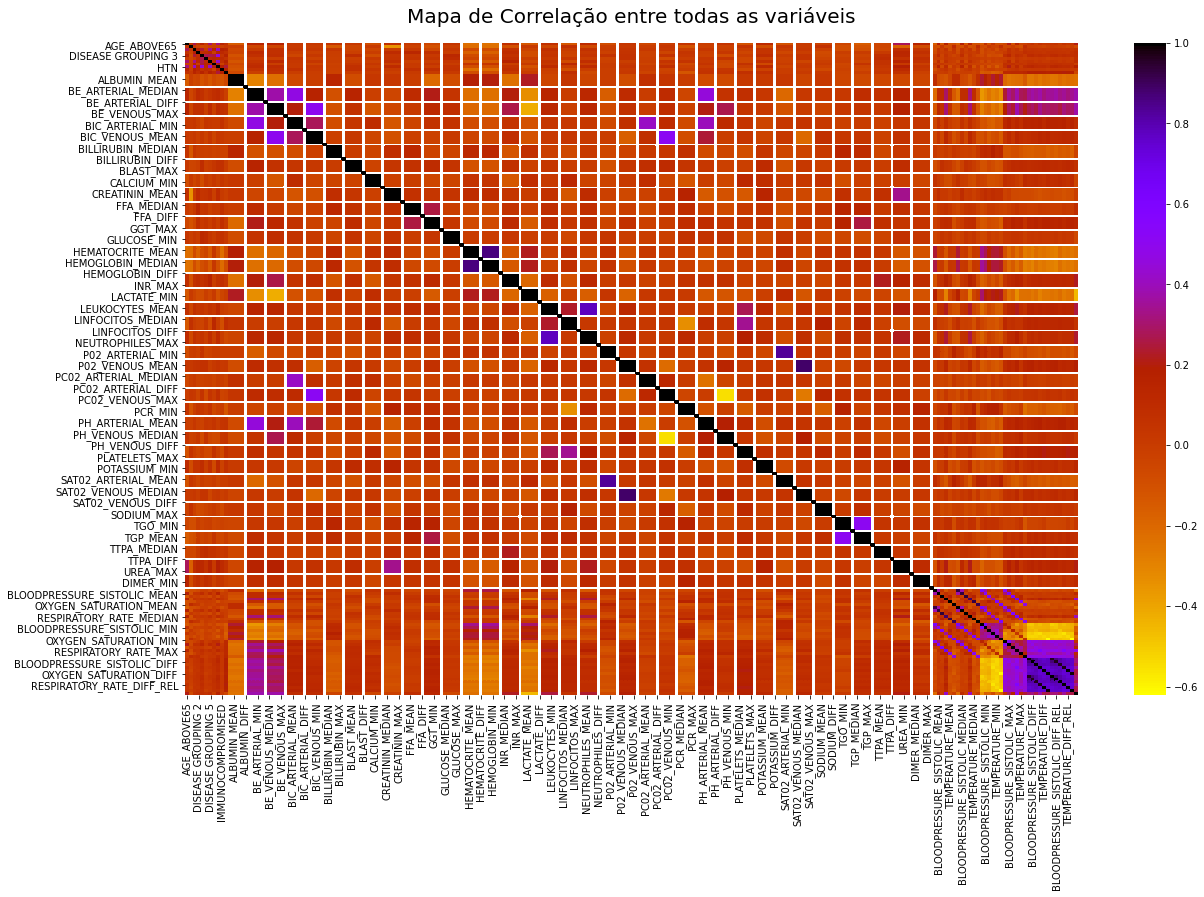

In [11]:
exibe_mapa_correlaçao(sirio_libanes,metodo='kendall',title='Mapa de Correlação entre todas as variáveis',cmap='gnuplot_r' , annot=False);

### Comentário sobre o mapa de correlação

> Note que o mapa é literalmente uma matriz quadrada. Na diagonal principal temos correlação da variável com ela mesma, por isso a coloração preta o que indica um coeficiente de correlação igual à 1.0.

> No canto inferior direito temos um grupo roxo, ou seja essas variáveis entre si tem uma correlação forte, entre 0.8. Esta variável `BLOODPRESSURE` com sufixos `DIFF` e `RELL`, na introdução foi tida como ocorre a dependência dessas variáveis e isso é um fato que faz a correlação ser alta. Por outro lado se tratando de dados biológicos devemos ter cuidado, pois o valor `MIN` de uma variável pode ser importante para a equipe tirar alguma conclusão e a amplitude (`DIFF = (MAX - MIN)`) também, mas o fato dessas variáveis terem uma correlação alta não implica necessariamente que trazem informações redundantes.

> O que pode ser feito para contornar este fato de features autamente correlacionadas é filtrar a correlação entre cada uma delas a partir de um valor de corte.

# Pre processamento

Nesta etapa vou modificar algumas variáveis afim de facilitar análises futuras. 

## Tratando `AGE_PERCENTIL`

Como já foi dito anteriormente a variável `AGE_PERCENTIL` é uma variável do tipo `object`, entretanto se analisar os valores unicos dela é possível notar que são dados do tipo categóricos porem ordinais:

In [12]:
sirio_libanes.AGE_PERCENTIL.unique()

array(['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th',
       '30th', 'Above 90th'], dtype=object)

Tendo então as categorias vou utilizar uma função da biblioteca [Sci-Kit Learn] para fazer a transformação na variável, de um dado categórico para um dado quantitativo:

In [13]:
sirio_libanes = categorico_para_quantitativo(sirio_libanes, 'AGE_PERCENTIL')
sirio_libanes.AGE_PERCENTIL.unique()

array([0.5, 0.8, 0. , 0.3, 0.6, 0.1, 0.4, 0.7, 0.2, 0.9])

Desta forma a transformação que foi feita é:

| ANTES| DEPOIS|
|---|---|
|10th | 0 |
|20th | 0.1 |
|30th | 0.2 |
|40th | 0.3 |
|50th | 0.4 |
|60th | 0.5 |
|70th | 0.6 |
|80th | 0.7 |
|90th | 0.8 |
|Above 90th | 0.9 |

### Comentário sobre transformação do `AGE_PERCENTIL`

> A escolha deste tipo de transformação é deixar os dados dentro do padrão das variáveis da base de dados. A maioria delas esta normalizada, ou seja, dentro do intervalo $[-1,1]$. Poderia deixa-la no intervalo $[0,9]$ como sugere o própio `LabelEncoder` do sci-kit learn, mas não segui este caminho por pura liberdade.

## Tratando registros com `NaN`

Na etapa de estatisticas descritivas verificamos que em média, cada registro tem pelo menos 1 dado do tipo `missing`, digo isto baseado na descrição do statsmodels.

Para tratar os dados faltantes vou seguir a sugestão encontrada no site do Kaggle, que é preencher com o dado anterior ou com o anterior. Este preenchimento considera que num curto espaço de tempo a variação dos dados não é tão abrupta.

O processo de preenchimento sera o seguinte: 

1. Agrupar registros pelo index `PATIENT_VISIT_IDENTIFIER`.
2. Realizar uma interpolação linear caso falte um entre dois dados.
3. Preencher com o valor anterior.
4. Preencher com o valor posterior.
5. Petornar a base de dados com os dados preenchidos.

Ao agrupar os dados pelo index eu tenho garantia que cada alteração será feita em cada grupo, evitando que o paciente indice 5 seja afetado pelo numero 4 ou 6.

In [14]:
sirio_libanes = preenche_nan(sirio_libanes)

## Selecionando registros que podem ser usados para o modelo

Como já foi dito na introdução do problema, podemos utilizar os dados dos registros cujo *o paciente ainda não foi para UTI*. Esta condição é imposta ao descrever o conceito de janela. 

<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2Fb1bc424df771a4d2d3b3088606d083e6%2FTimeline%20Example%20Best.png?generation=1594740856017996&alt=media' width=60%>

> Note na ilustração acima que não podemos usar a janela das 12h tendo em vista que o paciente foi para UTI neste momento. 

<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2F77ca2b4635bc4dd7800e1c777fed9de1%2FTimeline%20Example%20No.png?generation=1594740873237462&alt=media' width=60%>

> Outro ponto citado é que não podemos usar as janelas posteriores ao evento de ir para a UTI.

A filtragem das janelas úteis que eu vou fazer consiste em **eliminar a janela cujo o paciente foi para a UTI**, além disso, acidionar $1$ na coluna `ICU` da janela anterior. Veja o exemplo na imagem abaixo:

<img src='https://raw.githubusercontent.com/ConradBitt/BootCamp_DataScience/master/projeto_final/preprocessamento_filtro_janela.png'>

> O paciente foi para a UTI na janela `ABOVE_12`, logo esta janela não pode ser utilizada, isso esta indicado no quadradinho vermelho. Portanto o que será feito é adicionar $1$ na coluna `ICU` da janela anterior (`6-12`) e utilizar todas essas janelas disponíveis como esta indicado no quadradinho verde.

> **OBS 1**: *Verifique abaixo do quadradinho vermelho, a janela `0-2` o `ICU` desta linha é 1, ou seja, este paciente foi para a UTI na primeira janela e segundo a condição informada no Kaggle esta janela não pode ser utilizada e nem as posteriores. O que o filtro faz nesta situação é remover este paciente da base de dados.*

In [15]:
sirio_libanes = filtro_janelas_uteis(sirio_libanes)

> **OBS 2**: Tendo em vista que o filtro remove todos os pacientes que foram para UTI na primeira janela isso vai remover a normalização da base de dados. Antes do filtro, existia a mesma quantidade de pessoas 

## Tratando `WINDOW`

Assim como foi transformada a variável categórica `AGE_PERCENTIL` em uma variável quantitativa, vou transformar a variável `WINDOW` em uma variável quantativa de acordo com a normaliação da primeira janela. Em outras palavras, eu vou calcular a frequência de cada janela em relação a base de dados e vou dividir cada frequencia pela frequencia da janela nº1.

|`WINDOW` | Frequeência da janela |Frequência Normalizada da Janela| Normalização pela 1º Janela |
|---|---|---|---|
|0-2 |353 |0.250 | 1.00 |
|2-4 |326 |0.231 | 0.924 |
|4-6 |286 |0.203 | 0.810 |
|6-12|255 |0.181 | 0.722 |
|ABOVE_12| 190 |0.135 |0.538 |

A justificativa em fazer isso é porque estou assumindo que estar numa janela qualquer não é mais uma variável aleatória. Ao realizar o `filtro_janelas_uteis` a variável deixou de ser aleatória pois a frequencia . A maior parte dos pacientes vai passar no minimo uma vêz pela primeira janela e como queremos classificar o quanto antes a situação do paciente, dar peso maior para as primeiras janelas é razoável e a forma que eu encontrei de fazer isso é normalizando em função da primeira janela.

> Lembrando que essa transformação só pode ser feita após filtrar as janelas úteis, caso contrário, como a base de dados é normalizada, ao normalizar pela frequencia o resultado de todas as janelas seria igualmente provável.

Além disso, a ideia de que essa variável transformada seja decrescente pode ajudar a criar uma dependência inversa com a variável `ICU`, pois quanto menor o valor da variável `WINDOW` mais tempo a pessoa passou no hospital e se isso acontece é de se esperar que a pessoa esta lá porque realmente precisa do atendimento.


Uma outra possível abordagem é tentar utilizar uma distribuição de probabilidades geométrica para modelar esta transformação. O problema que eu tive nesta abordagem é a perda de memória da distribuição geométrica, isto é, a janela futura não depende da anterior e pro nosso problema em específico estar em uma ou outra janela não é um evento independente. Para mais informações sobre a distribuição de probabilidades geométrica consulte as notas de aula do curso [Introduction to Probability at anadvanced level](https://www.stat.berkeley.edu/~aditya/resources/AllLectures2018Fall201A.pdf) do professor Aditya Guntuboyina.

In [16]:
sirio_libanes = normaliza_window_pela_freq_prim_janeila(sirio_libanes,'WINDOW')

# Seleção de Modelos 

## O modelos escolhidos 

Para atingir o objetivo de estimar a necessidade ou não de um paciente precisar do serviço prestado pela unidade de terapia intensiva do hospital, precisamos não só de um modelo, mas de vários, a fim de comparar a qualidade de cada um deles. 

### Dummy Classifier 

A escolha de um modelo do tipo dummy se da por conta da necessidade de um *baseline*, isto é, se eu sortear uma pessoa aleatória em uma população e pedir pra ela classificar se um grupo de pessoas vai pra UTI ou não, a chance dessa pessoa classificar corretamente não será a melhor possível tendo em vista que ela foi sorteada aleatóriamente.

O exemplo do que consiste um dummy comparado a uma pessoa aleatória, só funciona se essa pessoa sorteada aleatoriamente não for um funcionária da área de saúde ou médica intensivista (hahaha!) por mais que exista a probabilidade dessa pessoa ser sorteada, em geral a quantidade das pessoas com conhecimento técnico em saúde não é tão alta, logo a probabilidade de uma dessas pessoas ser sorteada ao acaso não é tão alta. Portanto, os modelos Dummies são responsáveis por fazer esse papel de "*um chute aleatório*" e portanto qualquer modelo para ser considerado melhor deve estar no mínimo acima da capacidade preditiva do dummy.  

Vamos intenciar um [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn-dummy-dummyclassifier) do módulo Sci-Kit Learn:

In [17]:
dummy_classifier = DummyClassifier(random_state=seed,strategy='stratified')

### Regressor Logístico 

A regressão logistica faz parte de uma categoria de modelos estatisticos chamados *Lineares generalizados*. Esta ampla classe inclui também regressão ordinária e *ANOVA*, além das regressões multivariádas, como *ANCOVA* e a regressão loglinear; uma excelente abordagem analítica dessas técnicas é feita por [Agresti(2003)](https://www.amazon.com/Categorical-Data-Analysis-Alan-Agresti/dp/0470463635) e uma abordagem mais prática é feita por [Gujarati(2011)](https://www.amazon.com.br/Econometria-B%C3%A1sica-Damodar-N-Gujarati/dp/8563308327) usado em alguns cursos de econometria. 

A regressão logistica em si é bastante utilizada em ciências médicas e sociais, pois é bem útil para a classificação de classes ou eventos mutuamente exclusivos, por exemplo: 

* Aprovação / Reprovação

* Vitória / Derrota

* Sadio / Doente

Em geral problemas com essas características em que os resultados podem ser classificados em sucesso/fracasso ou $0$ e $1$, podem ser atacados com a regressão logistica, que apesar de ser um regressor se mostra muito útil em problemas cuja a resposta deve ser binária. É importante salientar que a regressão logistica não é a *função logistica*  apesar do modelo regressivo utiliza-la. 

Vamos instanciar um modelo de regressão logistica do Sci-Kit Learn, o [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression)

In [18]:
logistic_regression = LogisticRegression(random_state=seed)

### Classificador baseado em Máquinas de Vetores de Suporte 
O conceito do algorítmo de maquinas de vetores de suporte também podem resolver problemas de regressão ou classificação. Este algorítmo foi desenvolvido por Vladimir Vapnik e colaboradores na AT&T Bell Laboratories em 1997. São modelos mais rudimentares servem para resolver problemas de classificação linear binária e não probabilistica, entretanto, é possível utiliza-los em problema de várias saídas.

A ideia dos algorítmos SVM (*Suport Vector Machine*) é que a cada nova entrada será classifica em relação à um hiperplano. Obviamente existem muitos hiperplanos que podem separar dois conjunto de dados e portanto o objetivo é que distância de um ponto gerado pelo dado de entrada até o hiperplano classificador seja a maior possível.

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png' width=60%>

> Referência da imagem: https://scikit-learn.org/stable/modules/svm.html#svm-classification

Acima temos um exemplo de vários classificadores baseados em máquinas de vetores de suporte, perceba que dependendo do *kernel* escolhido o hiperplano que separa as classificações de cada dado muda (Isso acontece porque o kernel é um operador capaz de mudar o espaço vetorial para mais informações consulte [Boldrini 1984](https://www.amazon.com.br/%C3%81lgebra-Linear-J-L-Boldrini/dp/8529402022)). Vamos instanciar o modelo de classificação baseado em vetores de suporte do Sci-Kit Learn, o [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [19]:
svc = SVC(random_state=seed)

### Decision Tree

Existem dois tipos de modelos baseados em *Decision Tree* (Árvore de decisão), modelos de classificação e regressão.  Aqui vou tratar brevemente sobre como funciona um modelo de classificação, mas caso queira entender como funciona o algorítmo regressivo vou deixar o guia do usuário do Sci-kit learn aqui: [Decision Tree](https://scikit-learn.org/stable/modules/tree.html#decision-trees).

Árvores de decisão são amplamente utilizadas, na academia, por exemplo, em [A Comparative Study of Supervised Learning as Applied to Acronym Expansion in Clinical Reports](chttps://www.ncbi.nlm.nih.gov/pmc/articles/PMC1839635/) foi aplicado árvores de decisão e máquinas de vetores de suporte em análise de relatórios clínicos. Este algorítmo funciona se baseando em duas métricas, ou no coeficiente de gini descrito por Corado Gini em [*Variabilità e Mutabilità*](https://www.jstor.org/stable/1804762) ou através do conceito termodinâmico de [entropia](https://web.mit.edu/16.unified/www/FALL/thermodynamics/notes/node49.html). Essas são as métricas utilizadas pra "dizer o quão organizados/iguais estão os elementos do sistema".

A entropia pode ser definida como :

$$H(x) = -\sum_{i}^{n}{p(x_{i}) \log_{2}\Big({p(x_i)}}\Big),$$

A entropia pertence ao intervalo $[0, k-1]$, onde $k$ é o número discreto de classes possíveis. O valor de máxima entropia é quando as probabilidades de cada classe ocorrer, representadas como p(x) na fórmula, são iguais, isto é quando as classes são igualmente prováveis.

Basicamente usamos a entropia como um medidor de informação para entender o que acontece com um dado nodo $N_{i,j}$ quando "quebrado" em dois nodos $N_{i+1,j}$ e $N_{i+1, j+1}$.

<img src='https://raw.githubusercontent.com/ConradBitt/BootCamp_DataScience/master/projeto_final/arvore.png'>

Com isso podemos medir o ganho de informação à cada decisão de "quebrar" um nodo. O ganho será: 

$$\text{(Ganho Info)}_j = H(N_{ij}) - \sum_{i=0}^{N}{\text{PESO}_{N_j} * H(N_{ji})},$$

onde para se estimar o $\text{peso}$ do filho $i$ usamos a razão a quantidade de Nodos "filhos" $N_{1i}$ pela quantidade de Nodos "mãe" $N_{01}$

$$\text{peso}_{j} = \frac{\text{filhos}}{\text{pai}} = \frac{2}{1}$$

Este processo é feito recursivamente até que o ganho de informação seja igual a zero. Para mais informações consulte esta publicação no Medium [Como Funciona uma Árvore de Decisão](https://medium.com/data-hackers/como-funciona-uma-%C3%A1rvore-de-decis%C3%A3o-be3eba5918a1).

In [20]:
decision_tree_classifier = DecisionTreeClassifier(random_state=seed)

### Stochastic Gradient Descent

Se tratando de problemas de várias variáveis não basta uma derivada simples para buscar a situação de minimização dos resíduos, logo utiliza-se a função gradiente, que é uma derivada direcional que aponta sempre na direção onde ocorre a maior variação daquele conjuntos de variáveis. A sacada de analisar a direção contrária do gradiente é que ele vai apontar sempre na direção contrária à maior taxa de variação, isto é, na direção que minimiza.

Stochastic Gradient Descent (SGD) é uma abordagem simples, mas muito eficiente, para ajustar classificadores lineares e regressores sob funções de perda, como as máquinas de vetores de suporte (linear) e a regressão logística já citada.

Estritamente falando, SGD é apenas uma técnica de otimização e não corresponde a uma família específica de modelos de aprendizado de máquina. É apenas uma forma de treinar um modelo. Em geral consiste em minimizar a soma dos quadrados dos resíduos, assim como numa regressão comum. Acontece que não basta analisar apenas um gradiente de um grande conjunto de dados, a ideia então da técnica estocástica é dividir em lotes e ir computando o gradiente de pequenas amostras.

Tendo em vista que SGD não é um modelo em si, mas sim uma técnica, o que se faz é utilizar os modelos anteriores mas com um ajuste efetuado pelo SGD. Em geral o estimador é o mesmo, o que muda é a técnica de otimização. Por exemplo, quando usamos o `SGDRegressor` do [Sci-Kit Learn](https://scikit-learn.org/stable/index.html) com o hiper parâmetro (`loss = 'squared_loss'` e `penalty = 'l2'`) o resultado é basicamente uma regressão linear, ou seja, um modelo equivalente mas que é ajustado via SGD em vez de ser ajustado puramente pela minimização dos resíduos. Da mesma forma o `SGDClassifier`(`loss = 'log'`) resulta numa regressão logistica com ajuste SGD.

Por fim, vamos instanciar um classificador com a técnica do greadiente descendente estocastico, também do Sci-kit Learn, o [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier):

In [21]:
sgd_classifier = SGDClassifier(random_state=seed)

# A respeito das variáveis 

Difinido os modelos que serão utilizados na estimação passamos para o próximo passo, a seleção de variáveis. Como uma das tarefas exigidas é estimar a necessidade, ou não, de um paciente precisar do serviço de UTI, precisamos selecionar algumas features (variáveis) relevantes para essa estimativa.

Antes de selecionar as variáveis propriamente ditas, precisamos definir quais são nossas variáveis. Em geral um modelo pode ser expresso por uma função $f$, uma maquinha que vai receber insumos $x$ e vai retornar $y$. Matematicamente isso é expresso na forma: 

$$y = f (x),$$

a variável $y$ é chamada de target, alguns autores chamam de classificador, na matemática esta é *a variável dependente* porque depende de $x$, no nosso caso $y$ é a coluna `ICU` que classifica como sendo 1 os pacientes que precisaram do serviço de UTI e 0 para os pacientes que não precisaram.

A entidade $f$ é uma função, o nosso modelo propriamente dito, mas também pode ser um operador caso as variáveis sejam vetoriais ($\vec{x} e \vec{y}$), por fim, temos a variável $x$ chamada de variável independente que é basicante todas as outras colunas da base de dados (exceto `ICU`) que podemos utilizar para prever a necessidade do paciente no serviço da unidade de terapia intensiva.

Como já foi visto na etapa de análise exploratória temos 230 variáveis. Logo nossa variável independente é um vetor $\vec{x}$ onde cada componente deste vetor representa uma variável dos registros dos pacientes, isso significa que nosso problema pode ser representado matematicamente como: 

$$y = f(\vec{x}), \text{ onde }\vec{x}=(x_1,x_2,...,x_{230}).$$

Então essa será a abordagem geral na resolução do problema, aplicar um estimador em 230 features de dados fisiológicos a fim de responder uma pergunta binária. (*é um problema e tanto.*)


In [22]:
# Aqui aleatorizo os dados do sírio libanes
dados_para_estimadores = sirio_libanes.sample(frac=1, random_state=seed)

# Separando variáveis independentes x
x = dados_para_estimadores.drop('ICU', axis='columns')
# Separando variáveis dependentes y 
y = dados_para_estimadores['ICU']

Acima estou aplicando um embaralhamento nos dados do sírio libanês, isto porque apesar de existir uma "série temporal" do paciente, o objetivo não é classificar o paciente em si, mas sim uma situação de ir ou não pra UTI. Então ao fazer isso o que estamos dizendo basicamente é: 

> As features que vão pra UTI são essas enquanto as que não vão são outras. 

Estou fazendo isso porque, ao meu ver o modelo não tem que prever se **um paciente** vai pra UTI ou não, mas sim dadas as situação de cada feature classificar se nesta situação o paciente vai ou não para a UTI.

## Seleção de Features 

Eu pensei em aplicar tecnicas de análise de variância, entretanto muitas das variáveis foram constuidas uma dependendo da outra e uma das exigências da ANOVA é que as amostras sejam independentes, que suas populações sejam distribuidas normalmente e que as variâncias populacionais são iguais. O que não se verifica, como podemos demonstrar na célula abaixo, aplicando o teste de normalidade a cada variável:

### Teste de Normalidade: 

> $H_0: X = X\sim N(\mu,\sigma^2)$ *Variável $X$ provém de uma distibuição normal*

> $H_1: X \ne X\sim N(\mu,\sigma^2)$ *Variável $X$ NÃO provém de uma distibuição normal*

Rejeita-se $H_0$ se $p-$valor $< 0.05$.

In [23]:
executa_teste_normalidade(x)

,Normal_test
AGE_ABOVE65,0.000000e+00
AGE_PERCENTIL,2.597627e-130
GENDER,0.000000e+00
DISEASE GROUPING 1,1.191298e-166
DISEASE GROUPING 2,0.000000e+00
...,...
HEART_RATE_DIFF_REL,7.883918e-118
RESPIRATORY_RATE_DIFF_REL,2.857307e-178
TEMPERATURE_DIFF_REL,9.619962e-122
OXYGEN_SATURATION_DIFF_REL,0.000000e+00


#### Comentário sobre o teste de normalidade

> Como não temo evidência estatistica para aceitar que as variáveis se distribuem normalmente, então exitem várias retrições que devem ser consideradas a respeito destas variáveis e algumas alternativas. Por exemplo, podemos recorrer a testes não-paramétricos

### Teste Wilcoxon

O teste de U de Wilcoxon é um teste não paramétrico, ou seja, se aplica em distribuiçõe cujas estatisticas não provém de distribuições normais. Assim ele é muito útil para verificar se duas variáveis aleatórias independentes provém de uma mesma distribuição, independente de qual seja. Portanto as hipóteses são:

> $H_0$: $X\sim D(\mu,\sigma^2) = Y \sim D(\mu,\sigma^2),$ variável $X$ e $Y$ provém de uma mesma distribuição

> $H_1$: $X\sim D(\mu,\sigma^2) \ne Y \sim D(\mu,\sigma^2),$ variável $X$ e $Y$ **NÃO** provém de uma mesma distribuição

Rejeita-se $H_0$ caso $p$-valor $\le0.05$.

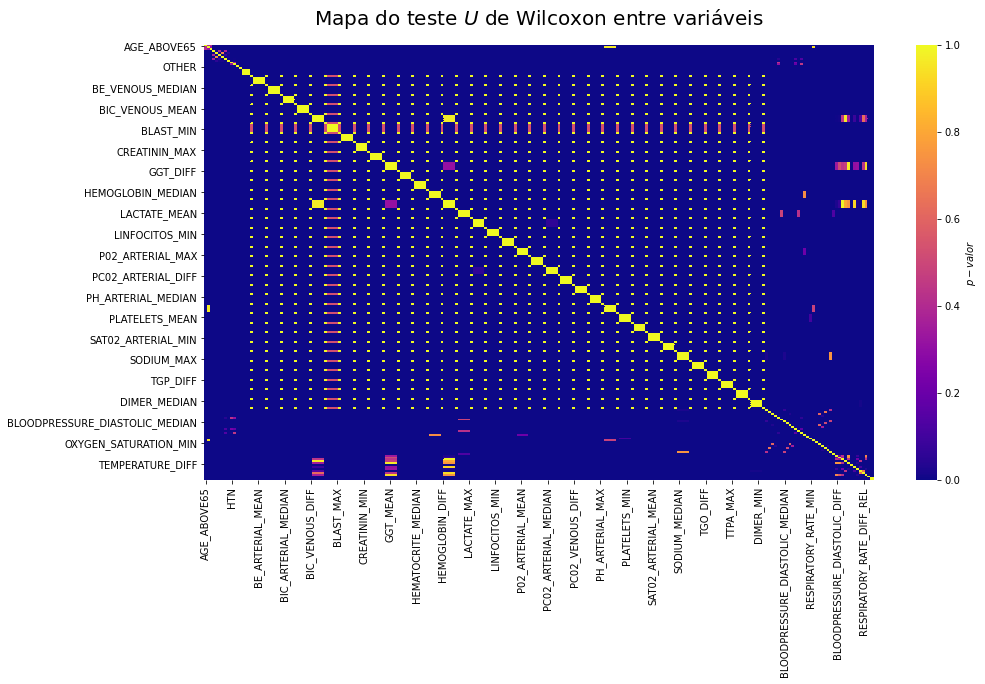

In [24]:
resultado_teste_U, _ = teste_wilcoxon_variaveis(x, exibe_mapa=True)

#### Comentário a respeito do teste U de Wilcoxon 

> No mapa acima podemos ver quais variáveis não tem a mesma distribuição de frequências, que são todas as partes em coloração azul escuro, isto porque são todas as partes em que o $p$-valor $\le0.05$, acima disso não se tem evidência estatistica para rejeitar a hipótese de que as variáveis provém de uma mesma distribuição.

> Note que uma das condições é que as **variáveis sejam aleatórias independentes**, portanto algumas variáveis certamente não se tem evidência para rejeitar $H_0$, pois foram construidas em função de outras, logo existe uma dependência linear entre as variáveis.


In [25]:
variaveis_selecionadas_teste_U = retorna_variaveis_menor_que_pvalor(resultado_teste_U)
variaveis_selecionadas_teste_U

Index(['AGE_ABOVE65', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'HTN',
       'OTHER', 'ALBUMIN_MEDIAN', 'ALBUMIN_MEAN', 'ALBUMIN_DIFF',
       'BE_ARTERIAL_MEDIAN', 'BE_VENOUS_MEDIAN', 'BIC_ARTERIAL_MEDIAN',
       'BIC_VENOUS_MEDIAN', 'BILLIRUBIN_MEDIAN', 'CALCIUM_MEDIAN',
       'CREATININ_MEDIAN', 'FFA_MEDIAN', 'GGT_MEDIAN', 'GLUCOSE_MEDIAN',
       'HEMATOCRITE_MEDIAN', 'HEMOGLOBIN_MEDIAN', 'LACTATE_MEDIAN',
       'LEUKOCYTES_MEDIAN', 'LINFOCITOS_MEDIAN', 'NEUTROPHILES_MEDIAN',
       'P02_ARTERIAL_MEDIAN', 'P02_VENOUS_MEDIAN', 'PC02_VENOUS_MEDIAN',
       'PCR_MEDIAN', 'PH_ARTERIAL_MEDIAN', 'PLATELETS_MEDIAN',
       'POTASSIUM_MEDIAN', 'SAT02_ARTERIAL_MEDIAN', 'SAT02_VENOUS_MEDIAN',
       'SODIUM_MEDIAN', 'TGO_MEDIAN', 'TGP_MEDIAN', 'TTPA_MEDIAN',
       'UREA_MEDIAN', 'DIMER_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN',
       'RESPIRATORY_RATE_MEAN', 'BLOODPRESSURE_SISTOLIC_MEDIAN',
       'HEART_RATE_MEDIAN', 'RESPIRATOR

#### Comentário sobre as variáveis selecionadas via Wilcoxon 

> Com certeza as variáveis que chamam bastante a atenção são `AGE_ABOVE65` que é se o paciente tem mais de 65 anos, o que é um fator bem importante, pois até a coleta desses dados a variante que estava em circulação no brasil afetava significativamente pessoas mais velhas.

> Além disso outras variáveis que chamam a atenção são a creatina média,linfócitos, neutrofilos, ureia, pois na literatura existem alguns artigos que já fizeram um trabalho parecido, onde essas variáveis se mostram importantes para a classificação de um paciente 

* [Crucial laboratory parameters in COVID-19 diagnosis and prognosis: An updated meta-analysis](https://doi.org/10.1016/j.medcli.2020.05.017)

* [Predicting Patient COVID-19 Disease Severity by means of Statistical and Machine Learning Analysis of Blood Cell Transcriptome Data](https://arxiv.org/abs/2011.10657)

In [26]:
x = x[variaveis_selecionadas_teste_U]

## A respeito da técnica: Definindo a separação das variáveis e validação cruzada

Como eu vou tentar estimar se um paciente vai ou não pra UTI, é necessário definir quais são as variáveis indepenentes e das variáveis dependentes, no caso $x$ e $y$, mas além dessa divisão é preciso separar esses dois conjuntos em *dados de treino* e *dados de teste*. 

Os *dados de treino* são conjuntos $(x_i,y_i)$ utilizados para ajustar regressão/classificação, enquanto os *dados de teste* são conjuntos $(x_j, y_j)$ usado para analisar a qualidade do modelo. O ponto é que o modelo vai treinar em cima dos dados de treino e testar o aprendizado nos dados de teste. 

O fato é que temos apenas 533 registros, isso é um conjunto limitado informações e quando se tem poucos dados é aconselhável utilizar a técnica de validação cruzada ou *cross_validation*.

Esta técnica consiste etapas consecutivas de treino e teste em conjuntos selecionarios aleatóriamente dentre os dados possíveis Veja o exemplo na imagem abaixo. Na primeira etapa o algorítmo vai separar a base de dados em conjuntos de treino e teste, então treina e testa. Depois disso ele passa para a próxima iteração onde separará outro conjunto de treino e teste até que passe por todo o conjunto de dados.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1280px-K-fold_cross_validation_EN.svg.png' width=70%>

A técnica de validação cruzada acima se chama validação cruzada por estatificação, pois a cada iteração temos um grupo selecionado e isso, em outras, palavras é uma estatificação do conjunto. Podemos também embaralhar a base de dados a cada iteração. Enfim, existem várias técnicas.

Entretanto pode acontecer um problema ao utilizar a validação cruzada: o *overfitting*. Ele ocorre quando o modelo fica extremamente eficiente ajustado aos dados de treino e teste utilizado na validação cruzada, mas não consegue generalizar as informações fora desse conjunto. A ideia então é eu separar um conjunto de dados que o modelo não vai utilizar na validação cruzada, esse conjunto é chamado de *dados de validação*.

Vamos definir esses conjuntos. É comum encontrar uma proporção de 25% de dados de treino e 75% em dados de teste. **Vou separar 20% dos dados totais para validação dos modelos** e dos 80% restante os dados de treino e teste. 80% dos dados reservados para treino e teste, 80% serão dados de treino e 20% dados de teste. Portanto no geral 20% serão dados de validação, 64%% dados de treino e 16% de teste.

Apesar dos grupos serem sempre estratificados de acordo com a proporção da coluna `ICU` a discussão a respeito dessas proporções de treino, teste e validação é completamente pertinente e o fato de ter poucos dados de treino e teste motiva o uso da validação cruzada em na fase de treino-teste.

In [27]:
# separar em dados pra treino-teste e validaçãoé relativamente
x_treino_teste, x_validacao, y_treino_teste, y_validacao = train_test_split(x,y, stratify=y,
                                                                            random_state=seed,
                                                                            shuffle=True, train_size=0.80)

# separando em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_treino_teste, y_treino_teste, stratify=y_treino_teste,
                                                        train_size=0.8, shuffle=True, random_state=seed)

print('Forma das features: \t\tTreino',x_treino.shape,'\tTeste',
      x_teste.shape,'\tValidação', x_validacao.shape)
print('Forma dos classificadores:\tTreino',y_treino.shape,'\t\tTeste',
      y_teste.shape,'\t\tValidação', y_validacao.shape)

Forma das features: 		Treino (902, 52) 	Teste (226, 52) 	Validação (282, 52)
Forma dos classificadores:	Treino (902,) 		Teste (226,) 		Validação (282,)


Verificando as proporções:

In [28]:
print('Proporção dados de Treno e Teste: ')
display(y_treino_teste.value_counts().to_frame())

print('Proporção dados de Validação:')
display(y_validacao.value_counts().to_frame())

Proporção dados de Treno e Teste: 


,ICU
0.0,998
1.0,130


Proporção dados de Validação:


,ICU
0.0,249
1.0,33


O resultado então teremos 1128 dados de treino e teste e 282 dados de validação. São poucos dados, para treino e teste, e portanto é um grande desafio, tendo em vista que geralmente modelos de machine learning precisam de grande quantidade de dados por exemplo preço de imóveis, dados de análise de risco, dados de navegação de usários, são chamados de *Big Data*. 

Já o nosso problema por se tratar de 353 registros com 1410 informações pode ser considerado *Small Data*. Luiz Costa apresentou um seminário com o título ["*Aplicações Práticas de Machine Learning*"](https://www.youtube.com/watch?v=Vh3pXNUuWws) no .Net Architescts Day 2014, onde ele fala um pouco de aplicações em small data.

Alguns modelos são otimizados para um grande volume de dados, por exemplo a Classificação utilizando o Stochastic Gradient Descent e o LinearSVC, outros como por outro lado são otimizados para *small data* como por exemplo a classificação baseada em vetores de suporte, como afirma a própria documentação do Sci-kit Learn.

> **C-Support Vector Classification**: The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer [[3]](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

---

# A respeito das métricas de qualidade

Existem várias métricas para avaliar um modelo. Uma métrica bastante comum é a precisão que mede quantos acertos o modelo teve dado o numero de amostras a que ele foi submetido. Por exemplo, se fornecemos 10 amostras para o modelo onde 7 estão rotuladas como $A$ e 3 rotuladas como $B$. Se o modelo classificar 5 como sendo $A$ e 5 como $B$, a precisão é: 

$$\text{acc} = \frac{5\text{ Acertos A} + 3\text{ Acertos B}}{10}=\frac{5+3}{10} = 0.8.$$

Note que a precisão indica os acertos do modelo mas desconsidera os erros das 2 classificações $B$ dado que o rótulo é $A$ e as 3 classificações $A$ dado que são rotuladas como $B$. Em outras palavras, a precisão não tras informações sobre quais classificações foram feitas de forma errada. 

Se tratando do objetivo que queremos atingir, que é classificar se pacientes vão precisar ou não dos serviços de uma UTI a precisão não é a única métrica importante, pois o impacto que se tem ao classificar uma pessoa na situação de "*não precisa de UTI*" dado que ela realmente precisa é imensuravel. Então precisamos de uma forma de metrificar o quanto um modelo classifica como "*precisa de UTI*" dado que a pessoa não precisa" e principalmente quando o modelo classifica como "*não precisa de UTI*" dado que a pessoa precisa.

## Revocação

Para ter uma abrangência maior a respeito dos acertos e erros de uma classificação utilizamos uma métrica chamada **recall** ou como também é conhecida **revocação**. A revocação consegue levar em conta os *falsos positivos* e os *falsos negativos*. Esses conceitos são mais fáceis de entender utilizando uma matriz chamada **matriz de confusão**, ela tem a seguinte forma:

$$\begin{bmatrix}
    a_{00} & a_{01} \\
    a_{10} & a_{11} \\
\end{bmatrix} = 
\begin{bmatrix}
    \color{blue}{TN} & \color{darkorange}{FN} \\
    \color{darkorange}{FP} & \color{blue}{TP} \\
\end{bmatrix}
$$

Quando falamos de precisão e revocação existem alguns termpos que precisam ser definidos:

> **Verdadeiro Negativo** ($\color{blue}{TN}$): Predição correta, dado que o valor verdadeiro é negativo. (elemento $a_{00}$)

> **Verdadeiro Positivo** ($\color{blue}{TP}$): Predição correta, dado que o valor verdadeiro é positivo. (elemento $a_{11}$)

> **Falso positivo** ($\color{darkorange}{FP}$): Predição errada, dado o valor verdadeiro que é positivo. (elemento $a_{10}$)

> **Falso Negativo** ($\color{darkorange}{FN}$): Predição errada, dado o valor verdadeiro que é negativo. (elemento $a_{01}$)

Para entender estes conceitos devemos pensar em expressões lógicas e em matrizes. O primeiro sub índice representa a **linha** do elemento da matriz, o segundo sub índice representa a coluna do elemento da matriz. As linhas **indicam sempre os valores reais independente da classificação do modelo** e as colunas **indicam sempre os valores preditos pelo modelo**.

A ideia então é aplicar a lógica binária aos sub ídices dos elementos da matriz de confusão: Pergunta `linha == coluna`? Responsta: `Verdadeiro` ou `Falso`, então "somamos" a resposta com o valor real da classificação. Veja as possíveis combinações:

> Pergunta: `0 == 0`? Reposta: `Verdade`. Dado que a classificação real é negativa, então é um `Verdadeiro negativo.`

> Pergunta`1 == 1`? Reposta: `Verdade`. Dado que a classificação real é positiva, então é um`Verdadeiro positivo`

> Pergunta`0 == 1`? Reposta: `False`. Dados que a classificação real é negativa, então é um  `Falso negativo`

> Pergunta `1 == 0`? Reposta: `False`. Dado que a classificação real é positiva, então é um `Falso positivo`

Temos então que a precisão é um indicador do acerto do em relação as classificações, sejá esta classificação um acer um verdadeiro positivo ou um verdadeiro negativo. Já a **precisão, como já foi dito acima, é um indicador da capacidade do modelo acertar, ou seja, de não rotular um como positivo algo que é negativo**.

Por outro lado, o recall, também conhecido como revocação é basicamente o simétrico da precisão. **Recall é um indicador da capacidade do modelo não rotular como falso algo que é positivo**.

## ROC e AUC 

A curva ROC (*Receiver operating characteristic*) ou curva característica é representação da razão TPR(True Positive Rate) em função da razão TNR (True Negative Rate), para vários valores do limiar de classificação. As expressões são:

$$ TPR = \frac{TP}{TP+FN} $$

$$TNR = \frac{TN}{TN+FP}$$
 
O TPR é também conhecido como sensibilidade (ou taxa de verdadeiros positivos), e TNR a especificidade ou taxa de falsos positivos.

Como foi dito ROC é uma curva, e geralmente não é intuitivo trabalhar com linhas, então surje a área sob uma curva chadama de AUC (*Area Under Curve*) que é um valor escalar e mede o desempenho geral de um classificador binário segundo [Hanley e McNeil (1982)](https://doi.org/10.1148/radiology.143.1.7063747).

O valor de AUC está dentro do intervalo $[0.5,1.0]$, onde o valor mínimo representa o desempenho de um classificador aleatório e o valor máximo corresponderia a um classificador perfeito (por exemplo, com uma taxa de erro de classificação equivalente a zero). 

O AUC é uma medida geral bem robusta para avaliar o desempenho dos classificadores de pontuação porque seu cálculo se baseia na curva ROC completa e, portanto, envolve todos os limites de classificação possíveis. A AUC é normalmente calculada adicionando áreas trapezoidais sucessivas abaixo da curva ROC. A abaixo mostra as curvas ROC para dois classificadores de pontuação A e B. Neste exemplo, o classificador A tem um valor de AUC maior do que o classificador B, justamente porque a curva se aproxima do eixo *True Positive Rate* logo ela  tem uma sensibilidade maior das quantidades de falsos positivos e falsos negativos:

<img src='https://media.springernature.com/lw785/springer-static/image/prt%3A978-1-4419-9863-7%2F1/MediaObjects/978-1-4419-9863-7_1_Part_Fig1-209_HTML.gif'>

> Referência da imagem: https://link.springer.com/referenceworkentry/10.1007%2F978-1-4419-9863-7_209

Ou seja, a métrica AUC seŕa o nosso indicador de qualidade e quanto maior o AUC mais capaz de identificar os falsos positivos e falsos negativos o modelo será. A métrica ROC é equivalente a aplicar o teste não paramétrico de Mann-Whitney-U às probabilidades de classificar os eventos que realmente ocorreram com aqueles que não ocorreram, como demonstram os pesquisadores S. J. Mason e N. E. Graham em [*Areas beneath the relative operating characteristics (ROC) and relative operating levels (ROL) curves: Statistical significance and interpretation*](https://doi.org/10.1256/003590002320603584)

O módulo `SKlearn` tem uma função que executa uma rotina para o cálculo a curva ROC e consequentemente o cálculo da área AUC e também tem uma função chamada [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report) que retornar a precisão e a revocação, além de algumas informações extras como [F1-score](https://en.wikipedia.org/wiki/F-score). 

Caso você esteja interessado em alguma métrica específica pode consultar o módulo metrics do Sci-kit Learn:

> `sklearn.metrics`: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

# Busca por melhores hiperparâmetros dos estimadores

Existem várias combinações de *hiperparâmetros* que podem melhorar a qualidade de um modelo. Hiperparâmetros são atributos fornecidos a um modelo que podem ser modificados a fim de melhorar a qualidade do estimador. Podemos testar cada um dos hiperparâmetros utilizando uma "grade" ([GrdiSearchCV](https://sklearn.org/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)) passando por todas as combinações possíveis testando e treinando cada um, entretanto isso pode levar muito tempo e um alto custo computacional. 

Dito isso o que podemos fazer para diminuir o tempo e o custo computacional é usar um algorítmo de "busca aleatória" ou melhor [RandomizedSearchCV](https://sklearn.org/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV), que diferente de uma grade, irá selecionar combinações aleatórias dentre todos os hiperparâmetros possíveis. É evidênte que esse modelo não irá extrair a melhor métrica possível, mas como não conhecemos quais hiperparâmetros irão melhorar a qualidade se usarmos uma busca aleatória significativamente grande podemos encontrar um conjunto de hiperparâmetros razoavelmente bom.

As etapas que serão executadas pelo algorítmo são:

1. Receber um estimador
2. Atribuir hiperparâmetros aleatórios ao estimador
3. Aplicar a validação cruzada neste estimador
4. Avaliar o desempenho em relação aos dados de teste usando uma métrica.
5. Voltar ao passo 1.

Vou criar uma função chamada `executa_RSCV_com_cv_SKF` que executa o modelo de otimização de hiperparâmetros Randomized Seach CV com a técnica de validação cruzada Stratified K Fold. Basicamente esta função vai receber um modelo instanciado, os dados de treino e teste, e um dicionário com quais hiperparâmetros estão disponíveis para a busca aleatória. 

Como resultado a função vai exibir um conjunto de estatisticas descritivas a respeito do treinamento e teste, como media, intervalo de confiança e os percentis, bem como irá retornar também o melho estimador encontrado pelo Randomized Search CV.

Ao final do projeto será exibido os resultados brutos de cada validação cruzada em uma tabela contendo a média e desvio padrão amostral do desempenho do modelo nos dados de treino e teste, utilizando como indicador de qualidade a métrica AUC caso tenha interesse.

O resultado nas tabelas são as estatisticas descritivas de todas as etapas de treino e teste, dentre as 50 iterações realizadas pela busca aleatória e em azul claro o modelo com o melhor conjunto de hiperparâmetros encontrado pelo Randomized Search CV.


## Dummy Classifier

O vou utilizar o Dummy Classifier pra exemplificar como será feita a busca de parâmetros, primeiro definimos um dicionário com as possíveis escolhas de parâmetros:

In [29]:
dummy_params = {'constant': [0,1],
                'random_state': [seed],
                'strategy': ['prior','stratified','most_frequent']}

depois executamos o modelo fornecendo o modelo (`dumm_classifier`), os dados de treino e teste, os hiperparâmetros possíveis. O resultado retorna o estimador já com os melhores hiperparâmetros e o resultado bruto da busca.

In [30]:
from sklearn.metrics import precision_recall_fscore_support
dummy_classifier, resultado_dummy = executa_RSCV_com_cv_SKF(dummy_classifier,x_treino_teste,y_treino_teste,
                                                            dummy_params,exibe_resultados_brutos=False,
                                                            random_state=seed)

calcula_precision_recall_fscore_support(dummy_classifier, x_teste, y_teste)

/home/conrado/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Estatisticas,count,mean,std,min,25%,50%,75%,max,Z_conf_int
DummyClassifier,,,,,,,,,
mean_test_score,6.0,0.494,0.009,0.482,0.487,0.5,0.5,0.500,"[0.487, 0.501]"
mean_train_score,6.0,0.500,0.000,0.500,0.500,0.5,0.5,0.501,"[0.5, 0.5]"


Melhor estimador: DummyClassifier(constant=0, random_state=3340758118)

 		DummyClassifier		


/home/conrado/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,fscore,support
Não precisa de UTI,0.88,1.0,0.94,200
Precisa de UTI,0.00,0.0,0.00,26


### Comentário sobre o resultado do Dummy Classifier

> Neste caso com o dummy não foram realizada 50 iterações pois a combinação dentre todos os parâmetros não supera 50.

> Como já foi dito anteriormente os modelos dummies são baselines a serem superados, porque servem como um indicador de "mero chute" o seja nosso modelo tem que tentar superar o recall score de 0.5 do Dummy Classifier

## Logistic Regression

Vamos definir os parâmetros que estão disponíveis para a busca aleatória. É possível consultar quais hiperparâmetros o modelo Logistic Regression aceita na documentação: 

> https://sklearn.org/modules/generated/sklearn.linear_model.LogisticRegression.html

In [31]:
logistic_regression_params = {
    'C': np.arange(0.05,1.1,0.05).round(2),
    'class_weight': [None,'balanced'],
    'max_iter': [10000],
    'multi_class': ['auto','ovr'],
    'penalty': ['l2'],
    'fit_intercept':[True,False],
    'random_state': [seed],
    'solver': ['liblinear','lbfgs', 'newton-cg'],
    'tol': [0.0001]
}

In [32]:
logistic_regression, resultado_logistic_reg = executa_RSCV_com_cv_SKF(logistic_regression,
                                                                      x_treino_teste,
                                                                      y_treino_teste,
                                                                      logistic_regression_params,
                                                                      exibe_resultados_brutos=False,
                                                                      random_state=seed)

Estatisticas,count,mean,std,min,25%,50%,75%,max,Z_conf_int
LogisticRegression,,,,,,,,,
mean_test_score,50.0,0.801,0.004,0.792,0.799,0.801,0.803,0.807,"[0.8, 0.802]"
mean_train_score,50.0,0.844,0.012,0.811,0.838,0.845,0.851,0.860,"[0.841, 0.847]"


Melhor estimador: LogisticRegression(C=0.2, class_weight='balanced', max_iter=10000,
                   random_state=3340758118, solver='newton-cg')


### Comentário sobre o modelo de regressão logistica

> Acima temos a tabela que indica um panorama geral do algorítmo que executamos. Temos 50 amostras aleatórias do modelo variando seus hiperparâmetros, o intervalo de confiança da média da métrica AUC nas previsões em cima dos dados de teste tem 95% de chance de estar dentro do intervalo [0.8, 0.802] já a pontuação média nos dados de treino esta no intervalo [0.841, 0.847]. Sendo o valor mais provável (média) dado esse processo de treinamento e teste é de 0.844 nos dados de treino e 0.801 nos dados de teste.

## Decision Tree Classfier

Os hiperparâmetros do Decision Tree Classfier que podem ser variados estão disponíveis em: 

> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [33]:
decision_tree_params = {
    'criterion': ['entropy','gini'],
    'splitter': ['best'],
    'max_depth': [None, 100,150, 200],
    'min_samples_leaf': np.arange(2,10,5),
    'max_features': [None,'sqrt', 'log2'],
    'min_samples_split': np.arange(2,20,2),
    'random_state': [seed],
}

In [34]:
decision_tree_classifier, resultados_decision_tree = executa_RSCV_com_cv_SKF(decision_tree_classifier,
                                                                            x_treino_teste,
                                                                            y_treino_teste,
                                                                            decision_tree_params,
                                                                            exibe_resultados_brutos=False,
                                                                            random_state=seed)

Estatisticas,count,mean,std,min,25%,50%,75%,max,Z_conf_int
DecisionTreeClassifier,,,,,,,,,
mean_test_score,50.0,0.663,0.030,0.580,0.646,0.667,0.688,0.725,"[0.654, 0.671]"
mean_train_score,50.0,0.969,0.018,0.938,0.952,0.969,0.983,0.999,"[0.964, 0.974]"


Melhor estimador: DecisionTreeClassifier(max_features='log2', min_samples_leaf=7,
                       min_samples_split=18, random_state=3340758118)


### Comentário sobre Decision Tree Classifier 

> O intervalo de confiança para AUC nos dados de teste é de [0.654, 0.671] e para os dados de treino [0.964, 0.974]. Sendo o valor mais provável 0.663 nos dados de teste e 0.969 nos dados de treino.

## SVC 

Os hiperparâmetros do modelo classificação baseado nas máquinas de vetores de suporte estão disponíveis em: 

> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [35]:
svc_params = {
    'C': np.arange(0.1,1.1,0.1),
    'cache_size': [200],
    'coef0': np.arange(0.1,1.1,0.1),
    'decision_function_shape': ['ovr','ovo'],
    'degree': [3],
    'gamma': ['scale'],
    'kernel': ['rbf','poly','sigmoid'],
    'max_iter': [-1],
    'probability': [True],
    'random_state': [seed],
    'shrinking': [True],
 'tol': [0.001],
}


In [36]:
svc, resultado_svc = executa_RSCV_com_cv_SKF(svc,
                                            x_treino_teste,
                                            y_treino_teste,
                                            svc_params,
                                            exibe_resultados_brutos=False,
                                            random_state=seed)

Estatisticas,count,mean,std,min,25%,50%,75%,max,Z_conf_int
SVC,,,,,,,,,
mean_test_score,50.0,0.739,0.053,0.604,0.736,0.767,0.769,0.772,"[0.725, 0.754]"
mean_train_score,50.0,0.836,0.114,0.615,0.734,0.903,0.909,0.912,"[0.805, 0.868]"


Melhor estimador: SVC(C=0.6, coef0=0.1, kernel='poly', probability=True, random_state=3340758118)


### Comentários sobre SVC

> Os resultados do modelo SVC nos dados de teste estão dentro do intervalo [0.725, 0.754] e para os dados de treino [0.805, 0.868]. Sendo o valor mais provável 0.739 nos dados de teste e 0.836 nos dados de treino.

## Classificação usando stochastic gradient descent 

Para consultar o que cada hiperparâmetro do SGDClassifier altera é possível consultar a documentação abaixo:

> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [37]:
sgd_params ={
    'alpha': [0.0001],
    'epsilon': np.arange(0.1, 0.3, 0.05).round(3),
    'eta0': np.arange(0.1, 0.5, 0.1).round(3),
    'l1_ratio': np.arange(0.15, 0.4, 0.1).round(3),
    'learning_rate': ['optimal','invscaling'],
    'loss': ['hinge','modified_huber','log', 'huber'],
    'max_iter': [1000],
    'random_state': [seed],
    'shuffle': [True],
    'tol': [0.001],
    'validation_fraction': np.arange(0.1,0.3, 0.05).round(3),
}

In [38]:
sgd_classifier, resultado_sgd = executa_RSCV_com_cv_SKF(sgd_classifier,
                                                       x_treino_teste,
                                                       y_treino_teste,
                                                       sgd_params,
                                                       exibe_resultados_brutos=False,
                                                       random_state=seed)

Estatisticas,count,mean,std,min,25%,50%,75%,max,Z_conf_int
SGDClassifier,,,,,,,,,
mean_test_score,50.0,0.782,0.017,0.718,0.779,0.786,0.792,0.809,"[0.777, 0.787]"
mean_train_score,50.0,0.834,0.027,0.781,0.812,0.838,0.857,0.861,"[0.827, 0.842]"


Melhor estimador: SGDClassifier(epsilon=0.25, eta0=0.3, learning_rate='invscaling', loss='huber',
              random_state=3340758118, validation_fraction=0.25)


### Comentários sobre Classificação com stochastic gradient descent 
> O intervalo de confiança para os dados de teste são [0.777, 0.787] sendo o valor mais provável 0.782 e nos dados de treino o intervalo é de [0.827, 0.842] sendo o valor mais provável 0.834. 	

# Resultados 

Como já foi dito anteriormente o processo de validação cruzada pode produzir overfitting ou seja, fazer com que o modelo se ajuste muito bem aos dados de treino e teste mas não consiga generalizar para dados de validação, ou seja, dados que o modelo nunca viu antes. 

Afim de evitar esse fenômeno separei dados de validação, que não foram utilizados no processo de treino e teste na validação cruzada, então vou comprar a qualidade do modelo nos dados de teste com os dados de validação.

## Analise da curva ROC 

Os resultados serão apresentados comparando-se as curvas ROC e AUC (área sobre a curva). Lembrando que quanto maior o valor de AUC, maior a sensibilidade do modelo em indentificar as quantidades de falsos positivos e falsos negativos. 

1. A curva em vermelho representará o AUC do $\color{red}{\text{classificador Dummy}}$, o baseline a ser superado.

2. A curva azul irá indicar o $\color{blue}{\text{AUC do classificador em acertar dos dados de teste}}$.

3. A curva laranja  indicará o $\color{darkorange}{\text{AUC do classificador prever o resultado dos dados de validação}}$, cujo o modelo nunca entrou em contato.

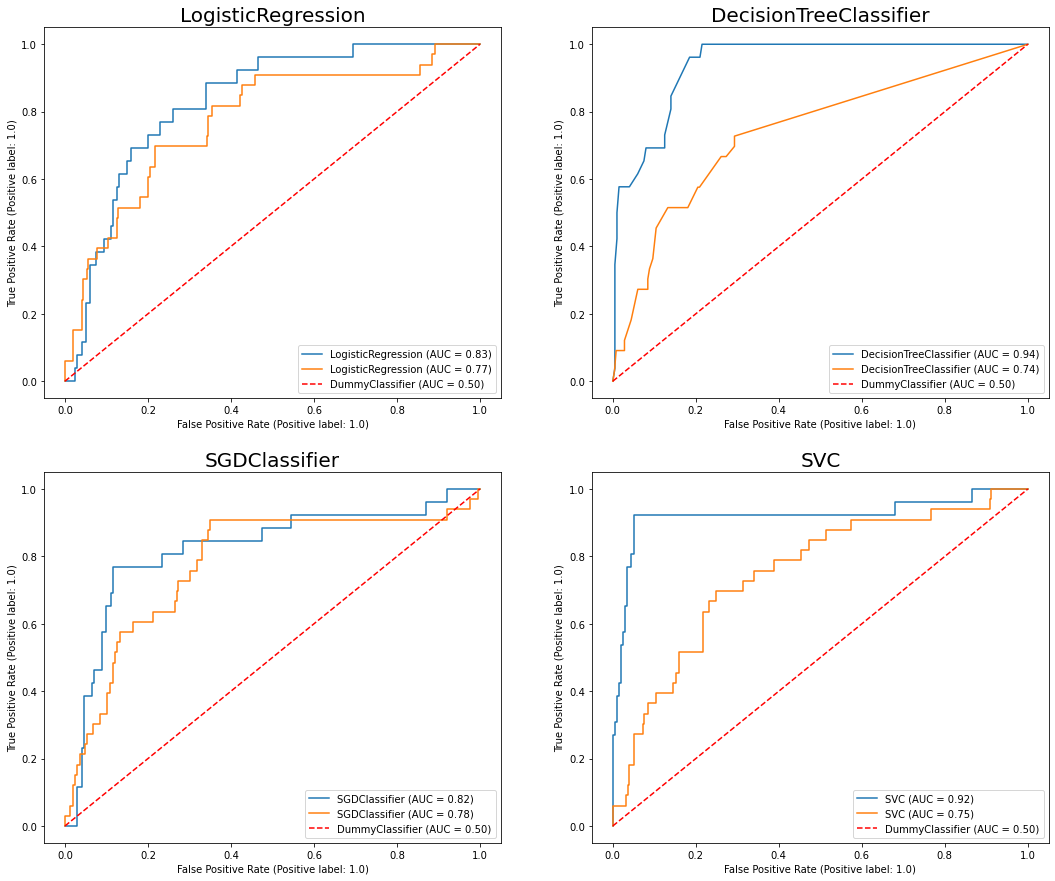

In [39]:
estimadores = [logistic_regression, decision_tree_classifier, sgd_classifier,svc]
comparacoes_roc(estimadores, x_teste, y_teste, x_validacao, y_validacao)

## Comentários sobre as pontuações dos estimadores

> Acima temos os resultados de cada curva ROC, que oferece uma relação entre falsos positivos e falsos negativos, dos estimadores que estamos testando para tentar resolver o problema da classificação de pacientes.

> Podemos notar que todos os estimadores tem um desempenho acima do baseline estipulado pelo dummy classifier indicado acima da linha vermelha tracejada. Ou seja, pela análise gráfica temos um resultado, no mínimo melhor que Dummy Classifier.

> Com respeito aos estimadores é de se esperar que a curva ROC dos dados de teste ($\color{blue}{\text{em azul}}$) tenham um desempenho maior do que nos dados de validação ($\color{darkorange}{\text{em laranja}}$), isso porque na validação cruzada inevitavelmente o modelo irá entrar em contato com alguns elementos dos dados de teste. Entretanto os modelos conseguiram generalizar ao ponto de ter um desempenho acima dos 70% mesmo em dados que nunca tinham visto antes que foram separados anteriormente. Em alguns casos, por exemplo o do estimador Logistic Regression a curva de validação chega bem próxima da dos dados de teste.

## Análise da Matriz de confusão

Como já foi dito na etapa de métricas de qualidade a matriz de confusão é uma forma avaliar os resultados perante a classificação real dos pacientes. Abaixo estão ilustradas as quatro matrizes de confusão dos classificadores. Lembrando que o eixo X representa a classificação do estimador e o eixo Y o valor real. 

Essas matrizes foram normalizadas em relação aos valores verdadeiros, ou seja, em relação às linhas. Também estou exibindo uma tabelinha com os valores dos dados de validação, isto é, o modelo teve que classificar 282 valores, sendo 249 rotulados como "0 : não precisa de UTI" e 33 como "1 : precisa de UTI".

,ICU
Validação,
0.0,249
1.0,33


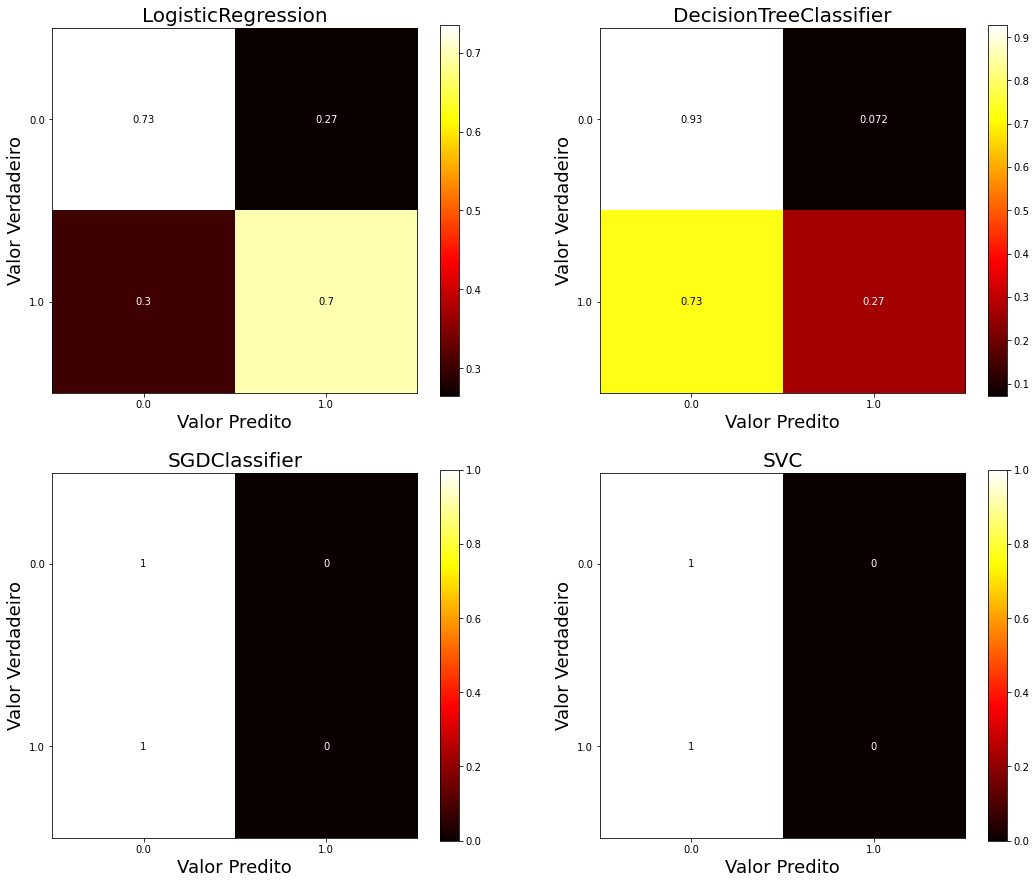

In [40]:
comparacoes_matriz_confusao(estimadores, x_validacao, y_validacao)

### Comentários sobre as matrizes de confusão

> Na matriz de confusão fica mais fácil de avaliar a qualidade dos modelos. Os dados estão normalizados pelas linhas (pelos valores reais) então a leitura que devemos fazer é por linh.

#### Logistic Regression

> No primeiro gráfico, do modelo Logistic Regression, linha 1, podemos concluir que de todos os pacientes que não precisam da UTI o modelo acertou corretamente 73% e 27% são falsos negativos, pessoas que não precisavam do serviço da UTI mas o modelo considerou que precisavam.

> Além disso, para os pacientes que realmente precisvam do serviço de UTI o modelo classificou corretamente 70% deles, entretanto 30% foram falsos positivos, ou seja, pessoas que precisavam do serviço mas não foram encaminhadas.

#### Decision Tree Classifier 

> O modelo de árvore de decisão classificou, dentre os pacientes que não precisavam de UTI, 93% corretamente e a quantidade de falsos negativos foi de 7%. Por outro lado a quantidade de falsos positivos deste modelo foi de relativamente alta, dentre as pessoas que precisavam de UTI ele classificou que 73% não precisavam e classificou corretamente apenas 27%.

#### SGD Classifier e SVC 

> A classificação dos dois modelos, stochastic gradient descent e suport vector classification, foram péssimas. Para resolver o problema eles simplesmente classificaram que todos os pacientes não precisam de UTI.


### Conclusão a respeito das matrizes de confusão 

Tendo em vista que nosso objetivo é determinar quais pacientes precisam ir ou não para o serviço da unidade de terapia intensiva todo os modelos no meu intendimento não tiveram um bom desempenho, pois se tratando de serviços de saúde os modelos SGDClassifier, SVC e DecisionTreeClassifier, com os parâmetros que eu utilizei não devem ser postos em produção em nenhuma hipótese, tendo em vista o custo de um falso positivo ser muito alto.

Considerando nosso objetivo, o modelo "menos pior" é o Logistic Regression com a menor proporção de falsos positivos dentre os modelos testados, mas ainda sim é um valor alto. O que pode ser feito é tentar aprimorar esse modelo.


## Precision-Recall 

Precision e recall, são duas métricas muito importantes que já podem ser observadas na matriz de confusão no tópico anterior. Essas métricas também são conhecidas como valor preditivo positivo (precision) e sensibilidade (recall). A ideia dessas métricas é, não só saber qual o modelo acerta mais, mas também qual modelo erra menos.

In [41]:
for estimador in estimadores:
    calcula_precision_recall_fscore_support(estimador, x_validacao, y_validacao)


 		LogisticRegression		


,precision,recall,fscore,support
Não precisa de UTI,0.95,0.73,0.83,249
Precisa de UTI,0.26,0.70,0.38,33



 		DecisionTreeClassifier		


,precision,recall,fscore,support
Não precisa de UTI,0.91,0.93,0.92,249
Precisa de UTI,0.33,0.27,0.30,33



 		SGDClassifier		


/home/conrado/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,fscore,support
Não precisa de UTI,0.88,1.0,0.94,249
Precisa de UTI,0.00,0.0,0.00,33



 		SVC		


/home/conrado/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,fscore,support
Não precisa de UTI,0.88,1.0,0.94,249
Precisa de UTI,0.00,0.0,0.00,33


### Comentário sobre valor preditivo positivo e sensibildiade 

> Como os modelos stochastic gradient descent e suport vector classification não tem nenhum valor preditivo, porque simplesmente consideram que nenhum paciente precisa de UTI, o que resta é avalisar a capacidade preditiva dos outros dois modelos, logistic regression e decision tree classifier.

> O valor preditivo positivo do modelo Logistic Regression em classificar ambas as situações de um paciente, tanto para os que precisam e que não precisam de UTI é 95% e 25%, respectivamente. Já a sensibilidade do modelo perante as mesmas avaliações são de 73% e 70%.

> Para a classificação baseada em árvore de decisão o valor preditivo positivo foi de 91% e 33%, dentre os pacientes que não precisam do serviço de UTI e os que realmente precisavam, respectivamente. A sensibilidade deste modelo foi de 93% para os pacientes que não precisavam de UTI e para os que precisavam foi de 27%.

# Conclusão

Tendo em vista que a seleção de features através do teste não paramétrico de Wilcoxon resultou numa seleção de variáveis já encontrada na literatura, foi possível treinar modelos que atingiram o objetivo do projeto, que era ter a capacidade de classificar se pacientes precisam ou não de um serviço de UTI.

Entretanto, a qualidade preditiva dos modelos é perfeitamente discutível, principalmente pelo custo de vida de classificar um paciente de forma errada ser extremamente alto. O melhor resultado encontrado foi utilizando a regressão logistica, onde o modelo se mostrou eficiente em classificar corretamente 73% das amostras que não precisavam de UTI oferecendo uma proporção de 27% de falsos negativos, além disso das amostras que realmente precisavam de uma UTI o modelo classificou corretamente 70% contra 30% de falsos positivos. 

Em projetos futuros podemos testar esses modelos utilizando outros parâmetros, outros modelos ou até mesmo tomar o modelo de Regressão Logistica como o modelo base a fim de aperfeiçoa-lo. É importante salientar que este não deve ser levado como um trabalho final, precisa ser aperfeiçoado, checado e corrigido, afim de proporcionar uma melhor qualidade não só nas métricas de avaliação mas também na qualidade de vida dos pacientes e dos funcionários do sistema de saúde que virão a utilizar este modelo.

# Agradecimentos 

Primeiramente quero agradecer meus amigos e familiares, em especial a minha mãe, por me aguentarem falando de python, física e outros assuntos não convencionais que me agradam bastante.

Agradeço o Grupo Alura por incentivar a educação, a tecnologia e o aperfeiçoamento profissional de varias pessoas no nível nacional e internacional, especialmente pela bolsa de estudo concedida para participar do BootCamp que foi fundamental.

Também quero agradecer o Scuba Team pelo apoio e diálogo nos grupos do Discord, especialmente ao Alan Spadini e ao Igor Nascimento Alves pelas dicas oferecidas à este projeto.

Além disso, gostaria de mensionar o departamento jurídico da Sociedade Beneficente de Senhoras do Hospital Sírio-Libanês, o Instituto de Pesquisa e Educação e o Squad de Arquitetura e Inteligência de dados Clínicos e Radiológicos, e agradecer por disponibilizar os dados no Kaggle e tornar este e muitos outros projetos possíveis. Muito obrigado.

# Referências 

## Módulos Python

1. [NumPy](https://numpy.org/)

2. [Stats Models](statsmodels.org/)

3. [Sci-kit Learn](scikit-learn.org/)

4. [Pandas](https://pandas.pydata.org/)

5. [Matplotlib](matplotlib.org/)

6. [Seaborn](https://seaborn.pydata.org/)

7. [GraphViz](https://graphviz.org/)


## Trabalhos consultados

1. [COVID-19 - Clinical Data to assess diagnosis](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)

2. [Lei Geral de Proteção de Dados - LGPD](https://www.planalto.gov.br/ccivil_03/_Ato2015-2018/2018/Lei/L13709.htm#ementa)

3. [Introduction to Probability at anadvanced level, Aditya Guntuboyina](https://www.stat.berkeley.edu/~aditya/resources/AllLectures2018Fall201A.pdf)

4. [Aplicações Práticas de Machine Learning, Luiz Costa, 2015](https://www.youtube.com/watch?v=Vh3pXNUuWws)

5. [AGRESTI, Alan. Categorical data analysis. John Wiley & Sons, 2003.](https://www.amazon.com/Categorical-Data-Analysis-Alan-Agresti/dp/0470463635)

6. [GUJARATI, Damodar N.; PORTER, Dawn C. Econometria básica-5. Amgh Editora, 2011.](https://www.amazon.com.br/Econometria-B%C3%A1sica-Damodar-N-Gujarati/dp/8563308327)

7. [HANLEY, James A.; MCNEIL, Barbara J. The meaning and use of the area under a receiver operating characteristic (ROC) curve. Radiology, v. 143, n. 1, p. 29-36, 1982.](https://doi.org/10.1148/radiology.143.1.7063747)

8. [Crucial laboratory parameters in COVID-19 diagnosis and prognosis: An updated meta-analysis](https://doi.org/10.1016/j.medcli.2020.05.017)

9.  [Predicting Patient COVID-19 Disease Severity by means of Statistical and Machine Learning Analysis of Blood Cell Transcriptome Data](https://arxiv.org/abs/2011.10657)

10. [*Areas beneath the relative operating characteristics (ROC) and relative operating levels (ROL) curves: Statistical significance and interpretation*](https://doi.org/10.1256/003590002320603584)

# Resultados Brutos 

## Dummy Classifier

In [42]:
resultado_dummy

,mean_fit_time,mean_test_score,std_test_score,mean_train_score,std_train_score
rank_test_score,,,,,
1,0.001463,0.500000,0.000000,0.5000,0.000000
1,0.001135,0.500000,0.000000,0.5000,0.000000
1,0.001048,0.500000,0.000000,0.5000,0.000000
1,0.001437,0.500000,0.000000,0.5000,0.000000
5,0.001084,0.482357,0.039337,0.5005,0.010343
5,0.001109,0.482357,0.039337,0.5005,0.010343


## Logistic Regression 

In [47]:
resultado_logistic_reg.to_csv('raw_data_logistic_regression.csv', index=False)
resultado_logistic_reg

,mean_fit_time,mean_test_score,std_test_score,mean_train_score,std_train_score
rank_test_score,,,,,
1,0.032454,0.807402,0.036191,0.842908,0.008358
2,0.048797,0.807091,0.035549,0.845637,0.008372
3,0.025698,0.805734,0.035369,0.851203,0.008650
3,0.053362,0.805734,0.035369,0.851189,0.008647
5,0.047948,0.805539,0.035615,0.852477,0.008763
6,0.048555,0.804841,0.036085,0.853631,0.008781
7,0.035910,0.804415,0.036073,0.854676,0.008755
8,0.030983,0.803704,0.038661,0.835461,0.007654
9,0.042508,0.803584,0.036505,0.843848,0.007421


## Decision Tree Classifier 

In [48]:

resultados_decision_tree

,mean_fit_time,mean_test_score,std_test_score,mean_train_score,std_train_score
rank_test_score,,,,,
1,0.005442,0.725043,0.040735,0.938281,0.004744
2,0.006172,0.704434,0.040279,0.977043,0.003675
3,0.005356,0.699381,0.046133,0.958081,0.005210
4,0.015574,0.696083,0.069315,0.968513,0.005657
4,0.015694,0.696083,0.069315,0.968513,0.005657
4,0.016150,0.696083,0.069315,0.968513,0.005657
7,0.005557,0.693943,0.049946,0.967235,0.002690
8,0.008800,0.692450,0.031416,0.961835,0.002385
9,0.005038,0.689322,0.049995,0.948062,0.006874


## Suport Vector Classifier 

In [49]:

resultado_svc

,mean_fit_time,mean_test_score,std_test_score,mean_train_score,std_train_score
rank_test_score,,,,,
1,0.105572,0.772134,0.030467,0.905795,0.005349
2,0.104190,0.771748,0.031326,0.904874,0.005841
3,0.108851,0.771594,0.031183,0.904826,0.005768
4,0.113836,0.771515,0.031036,0.903879,0.006217
4,0.104731,0.771515,0.031036,0.903879,0.006217
6,0.108226,0.771322,0.030927,0.903872,0.006242
7,0.109067,0.771012,0.030896,0.903164,0.006328
8,0.104729,0.770819,0.031707,0.903101,0.006479
9,0.107775,0.770780,0.030899,0.903231,0.006369


## SGD Classifier 

In [50]:
resultado_sgd

,mean_fit_time,mean_test_score,std_test_score,mean_train_score,std_train_score
rank_test_score,,,,,
1,0.005715,0.809420,0.039736,0.838640,0.009677
2,0.006684,0.805315,0.039326,0.835238,0.009789
2,0.005674,0.805315,0.039326,0.835238,0.009789
2,0.005679,0.805315,0.039326,0.835238,0.009789
5,0.005650,0.800308,0.038443,0.828638,0.013054
6,0.008700,0.799086,0.040631,0.820665,0.007363
6,0.008825,0.799086,0.040631,0.820665,0.007363
8,0.008313,0.794856,0.040878,0.809684,0.008678
8,0.008304,0.794856,0.040878,0.809684,0.008678
